<a href="https://colab.research.google.com/github/ganeshhgupta/CCBD/blob/main/EventBasedCameraHoG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-04d6d400fb0c>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  events = pd.read_csv(file_path, header=None, delim_whitespace=True)


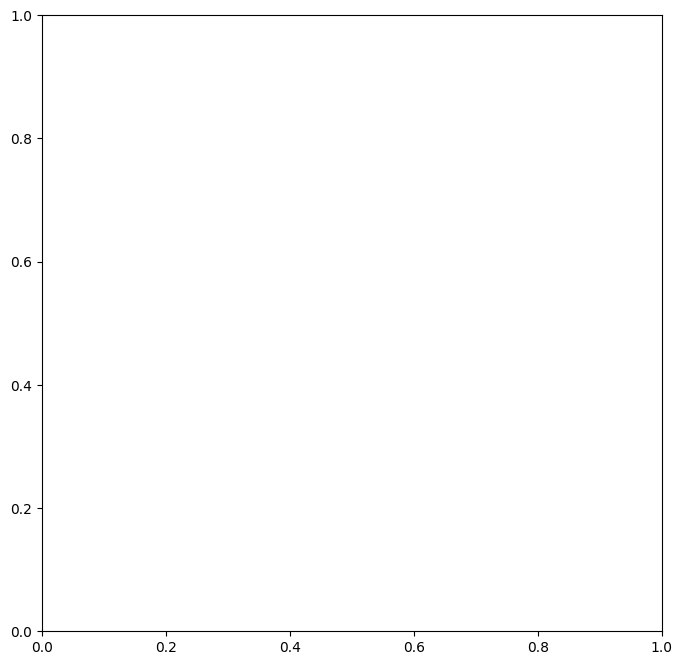

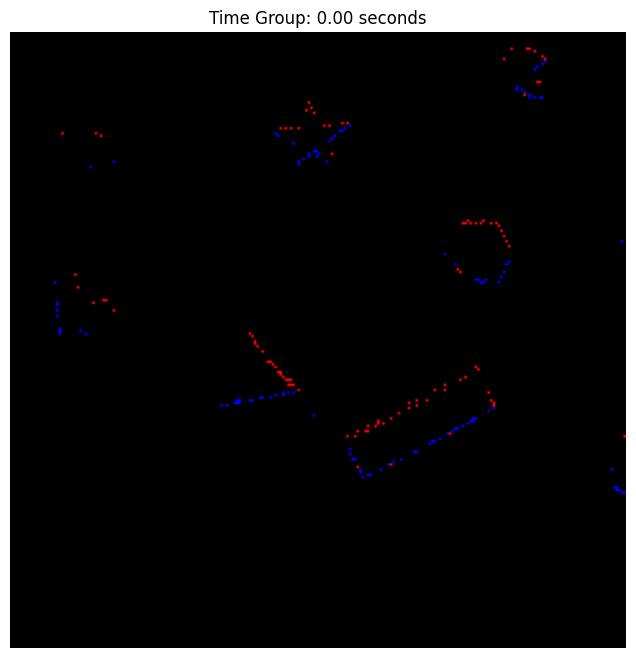

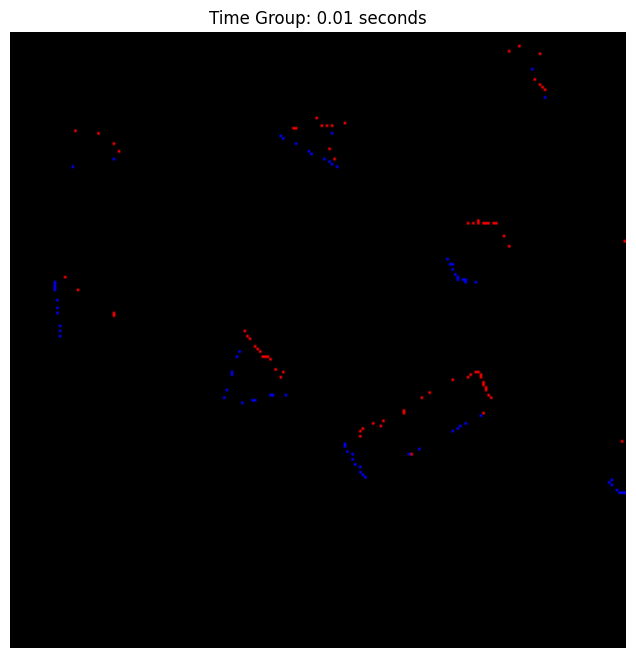

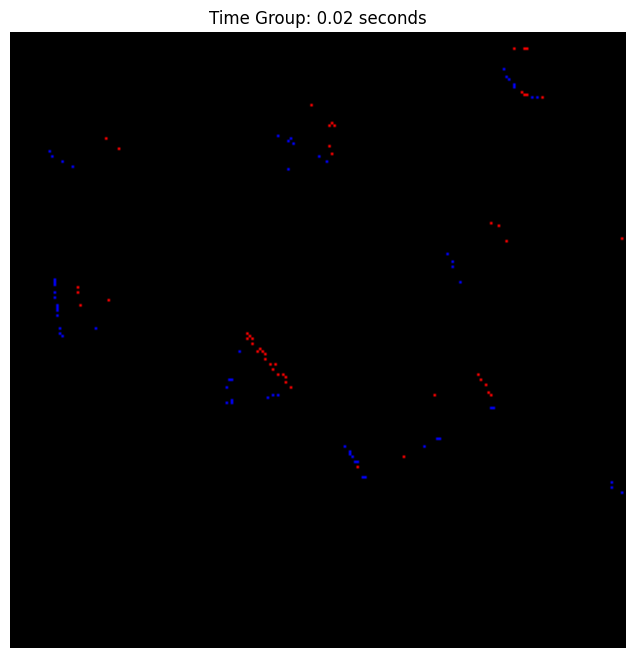

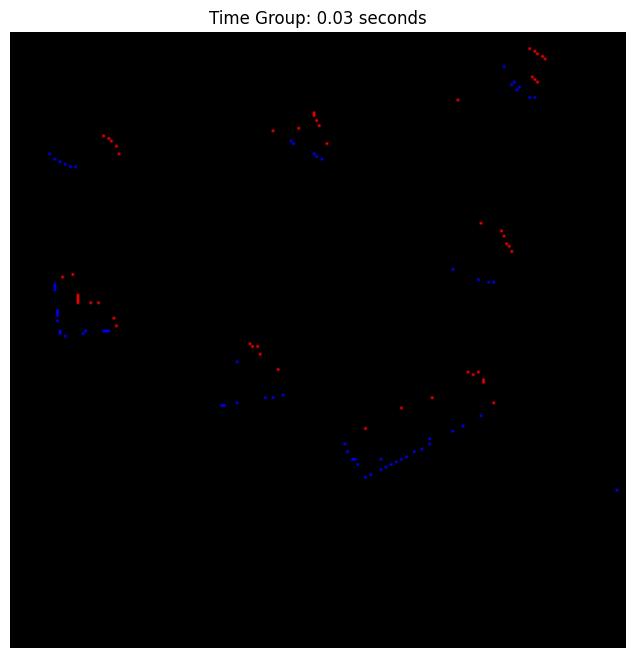

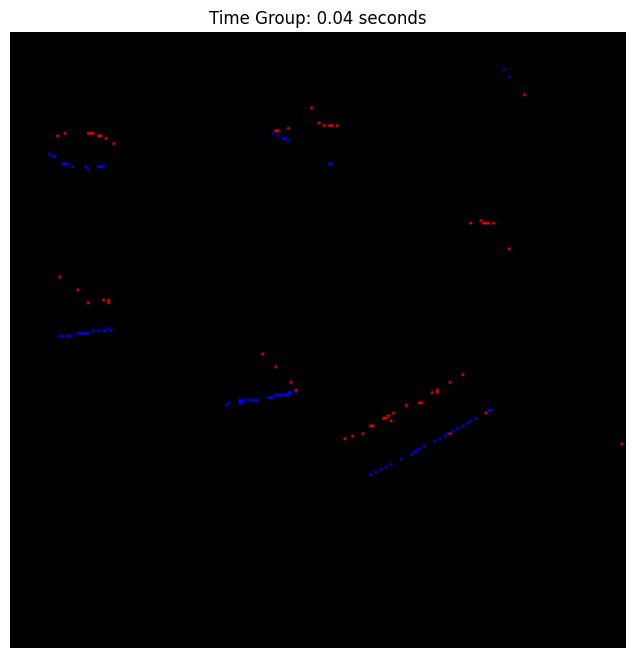

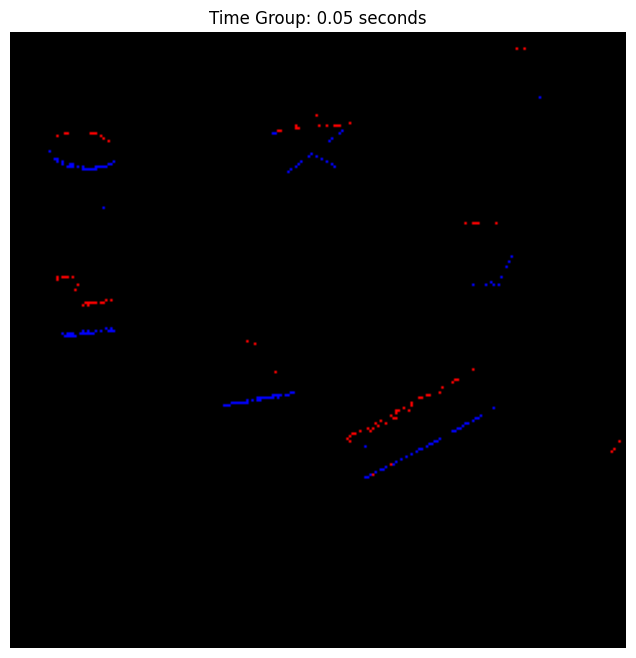

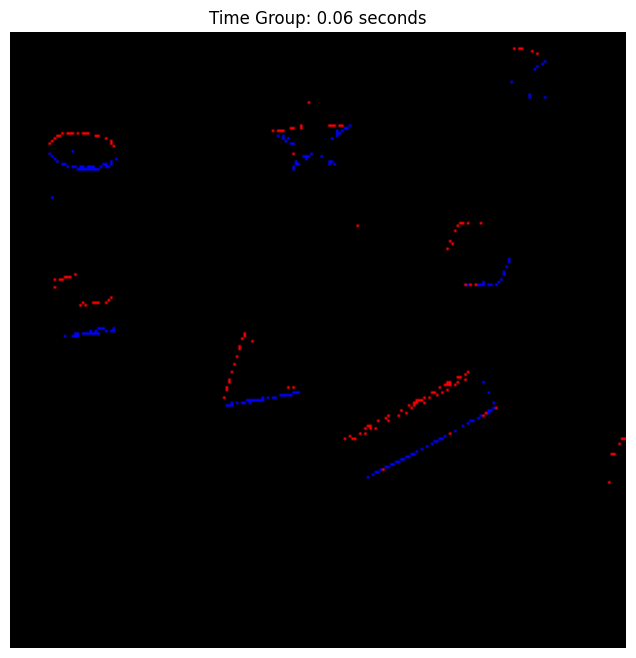

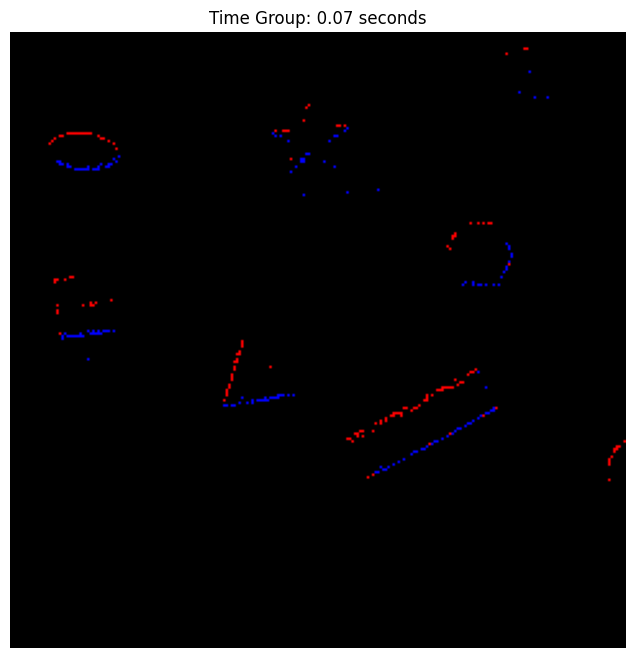

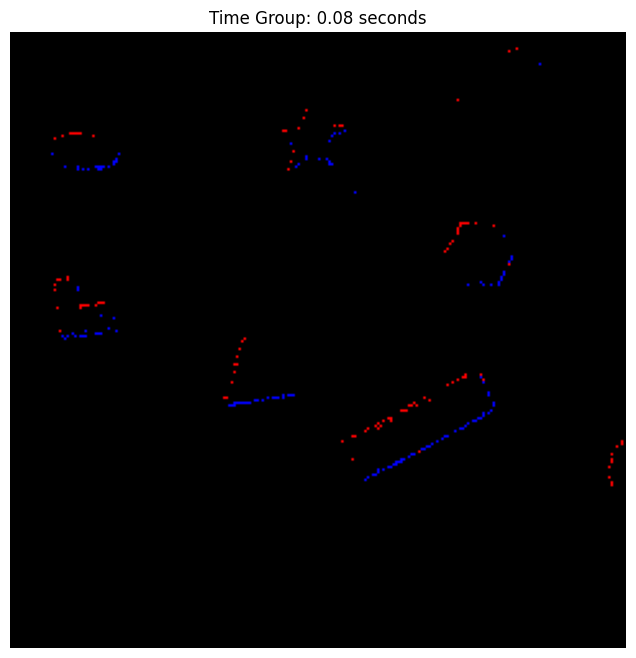

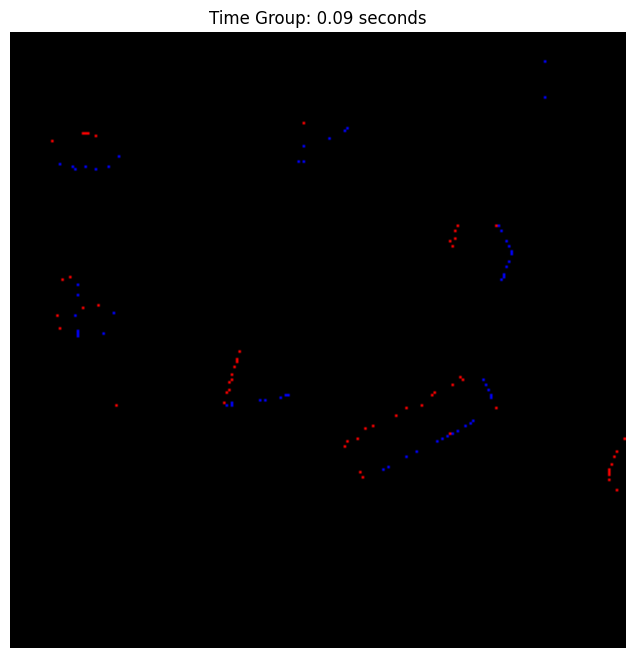

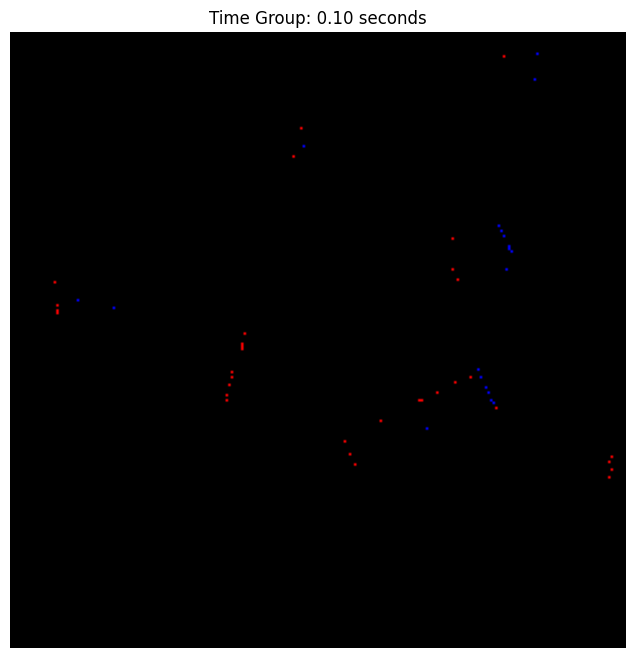

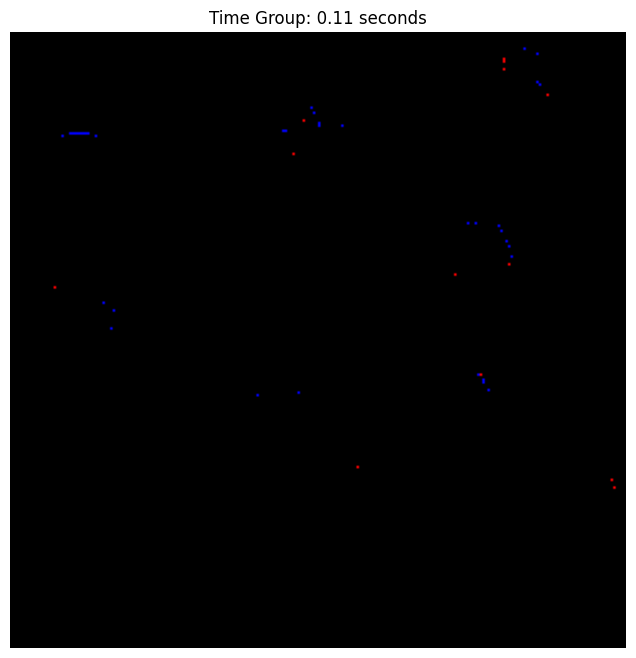

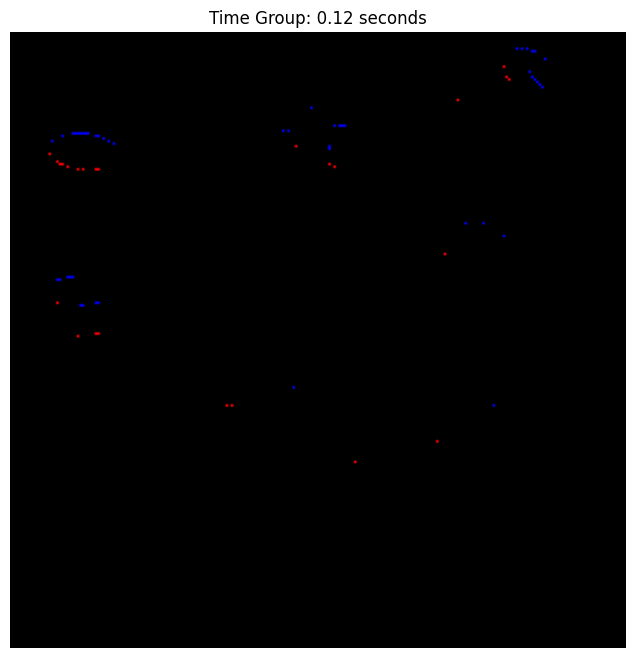

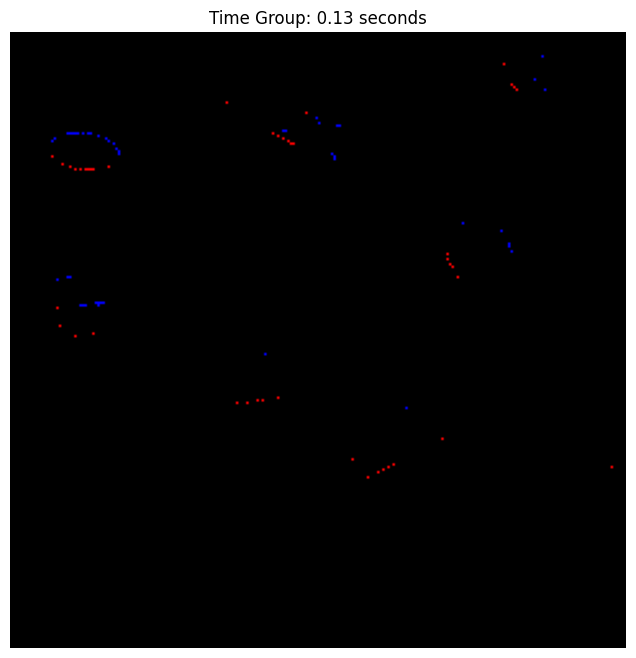

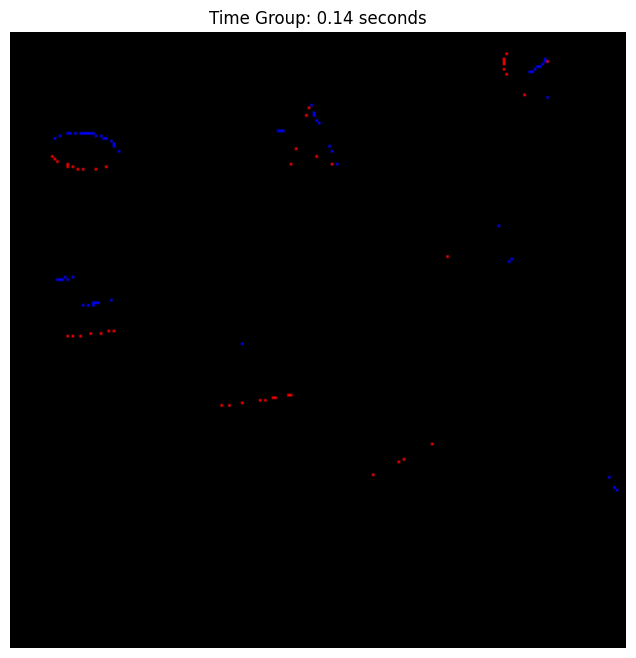

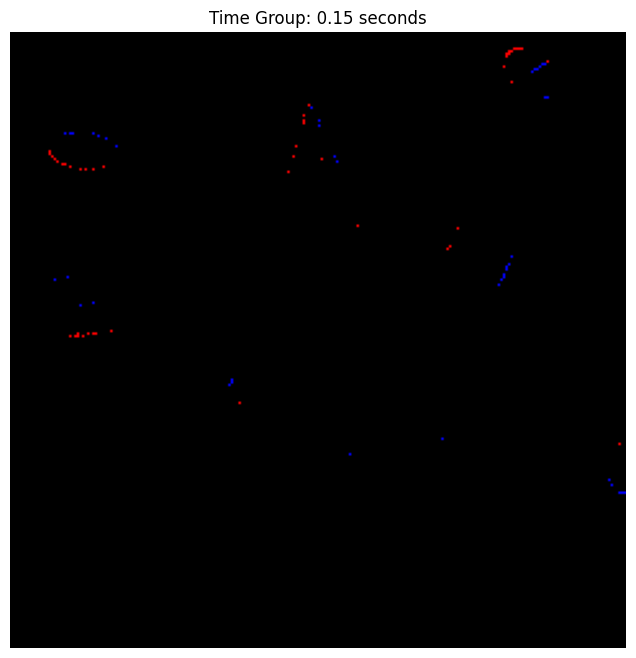

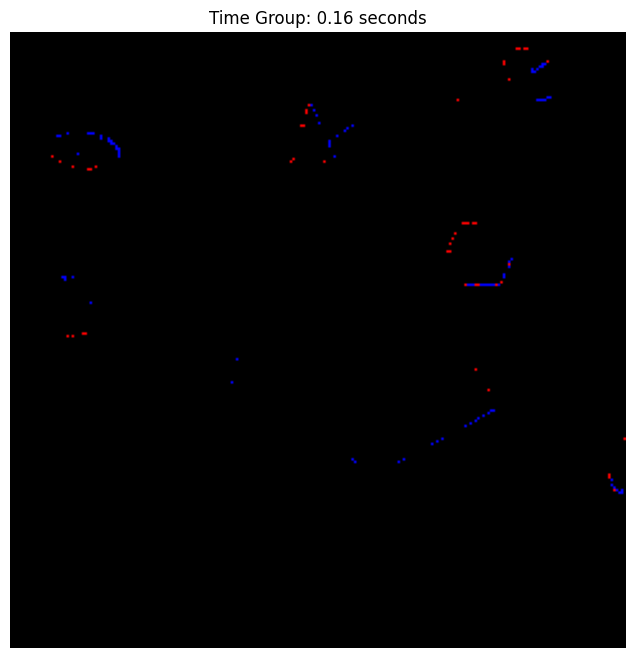

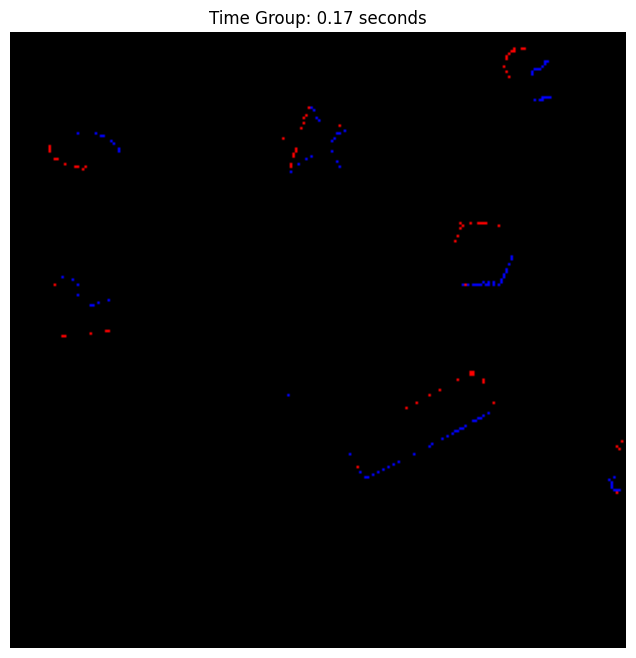

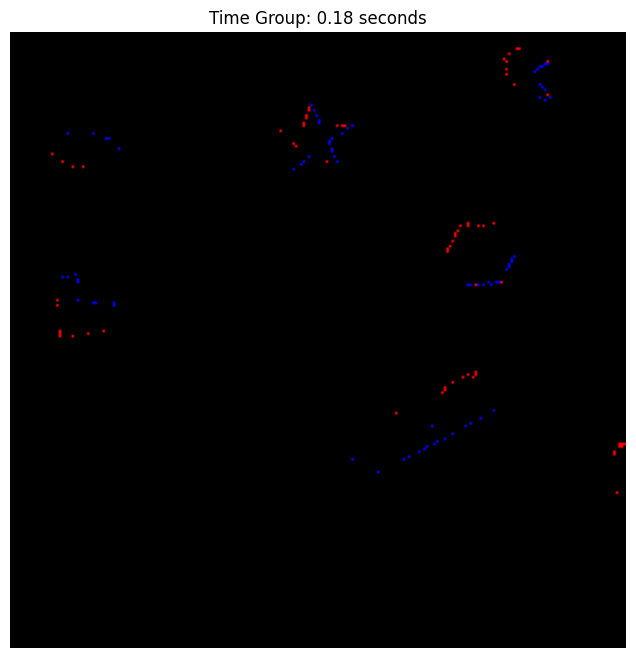

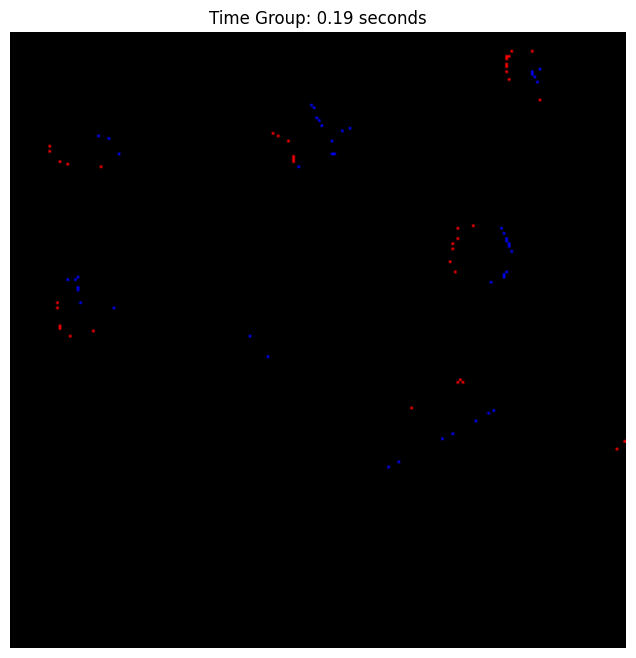

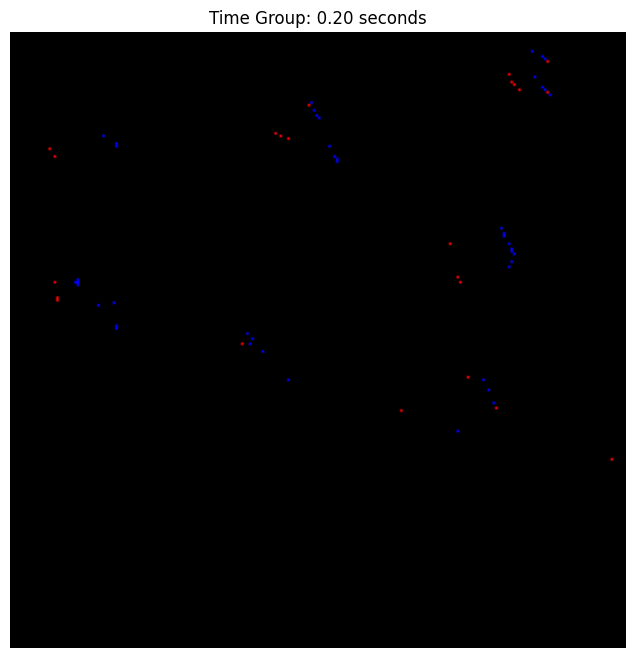

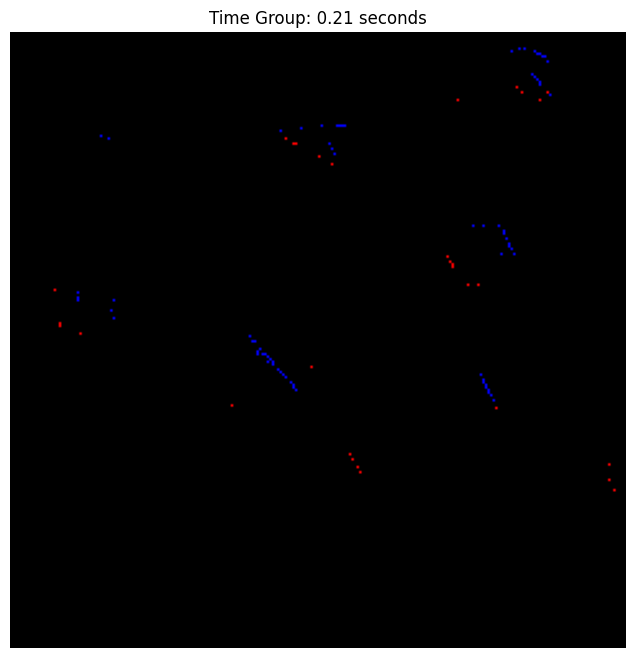

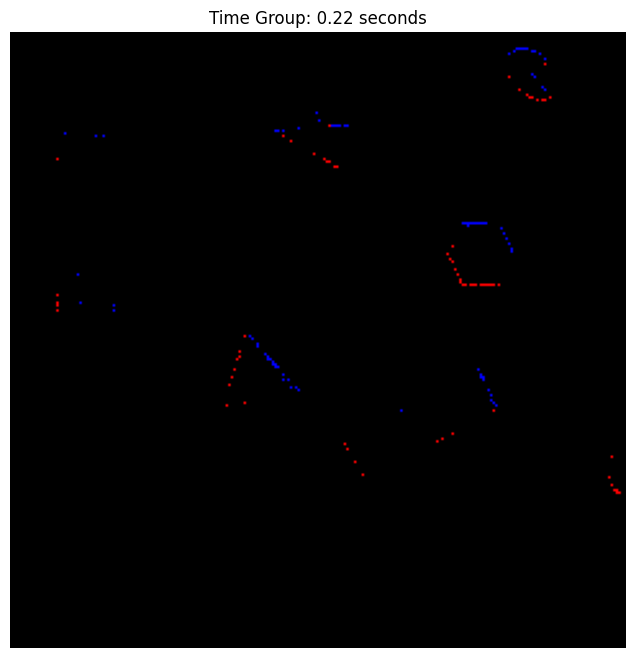

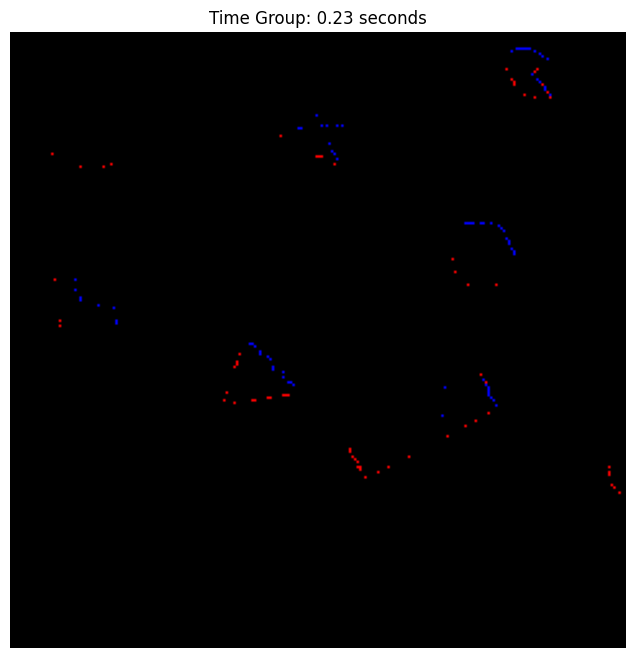

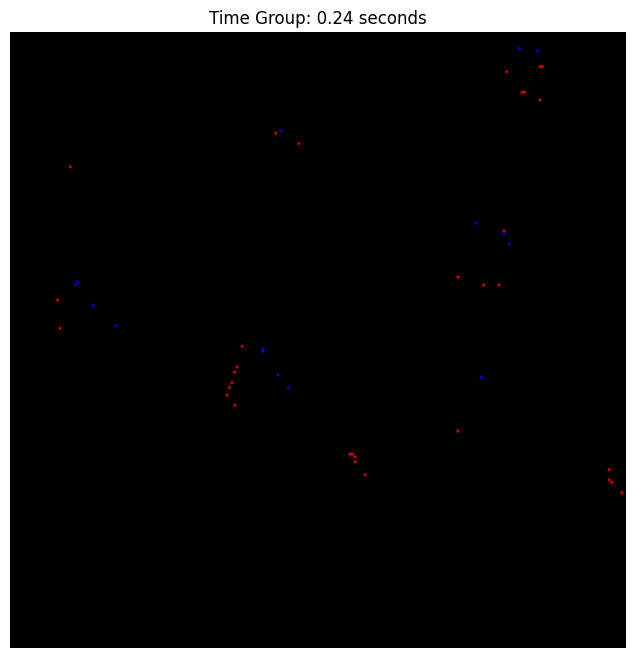

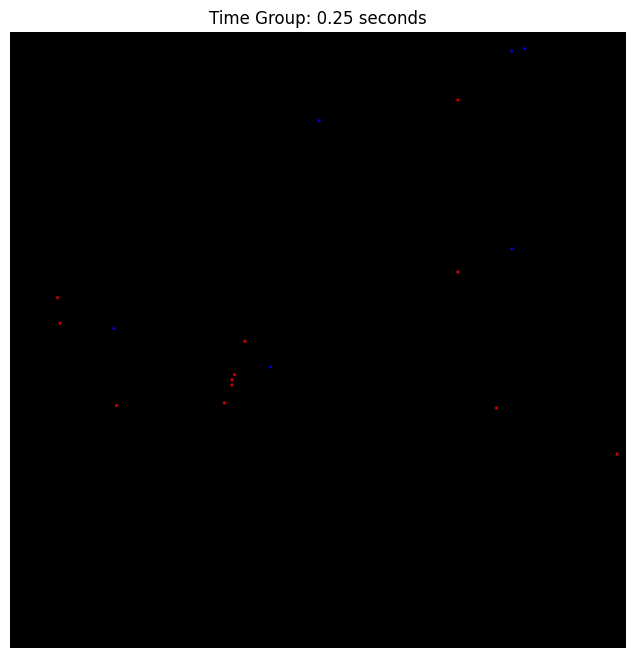

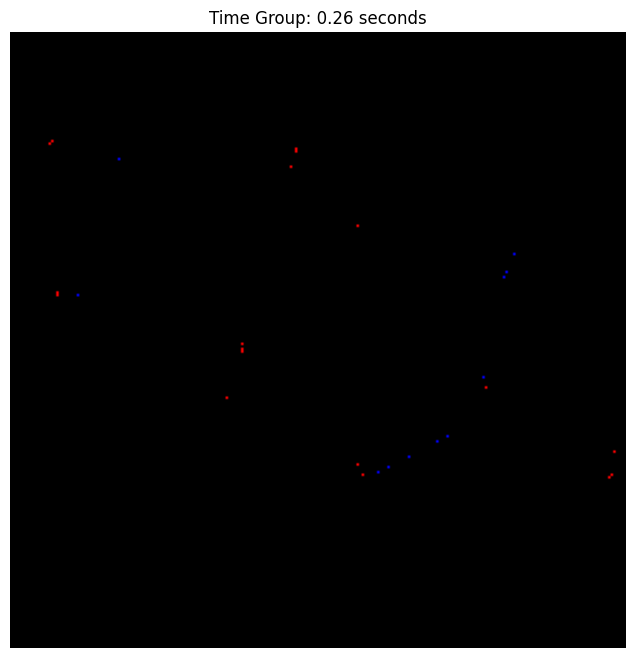

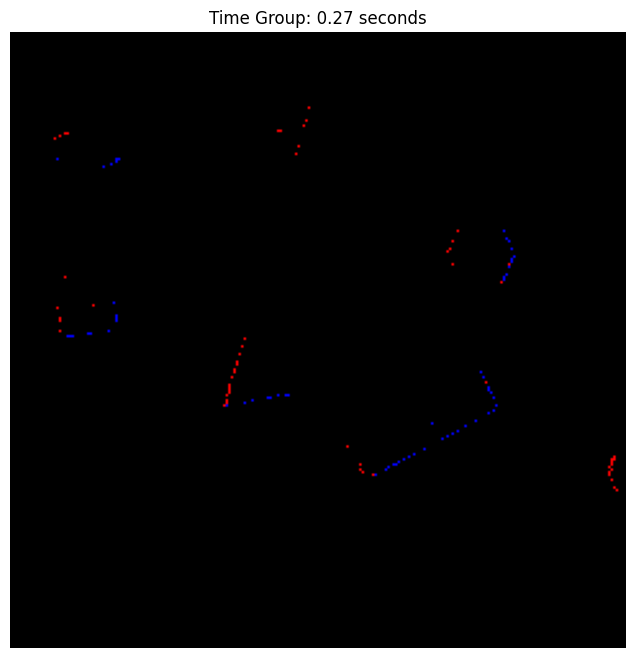

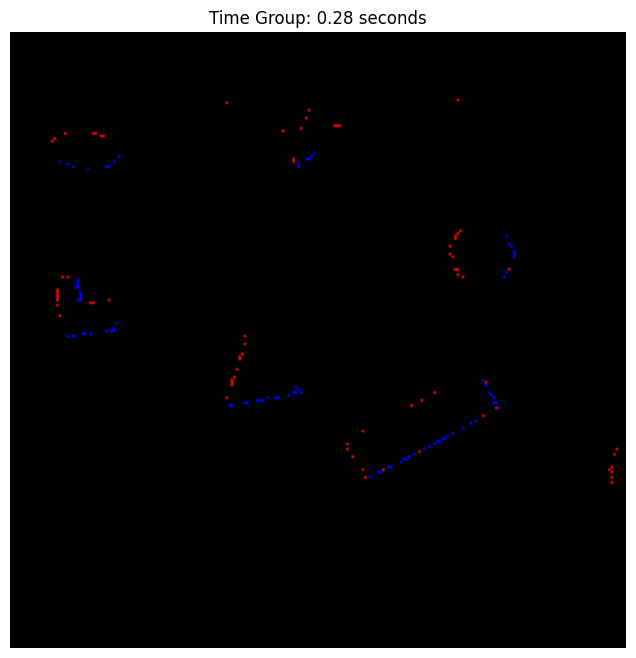

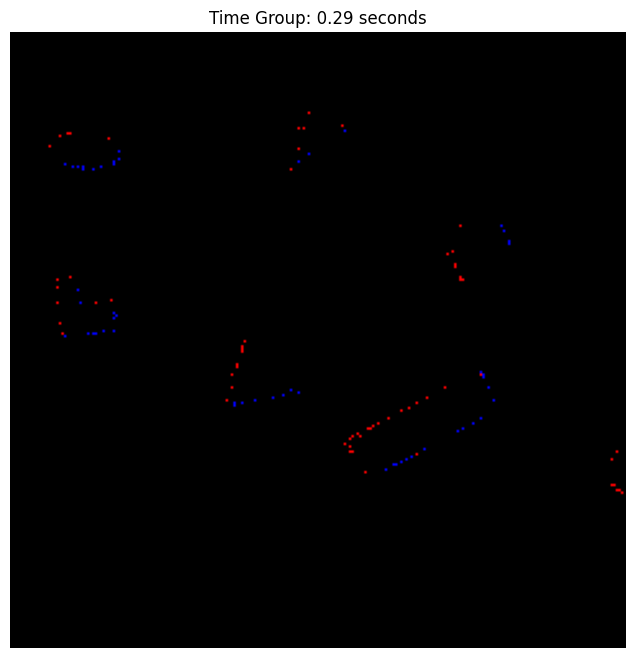

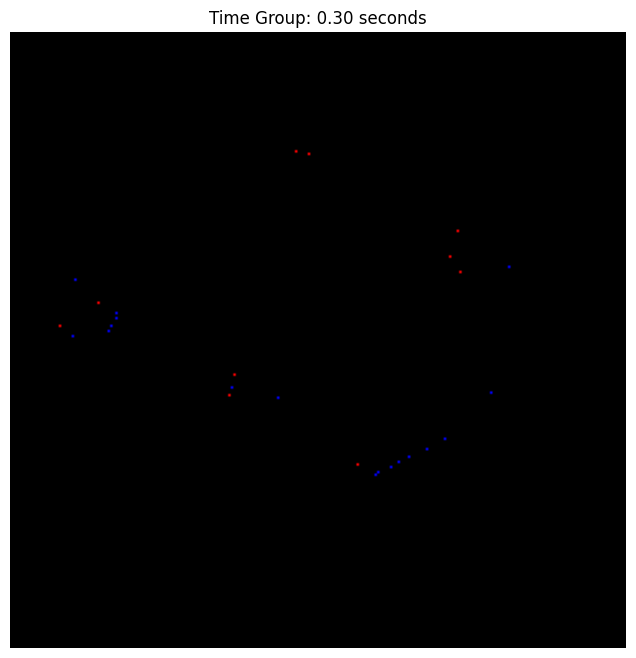

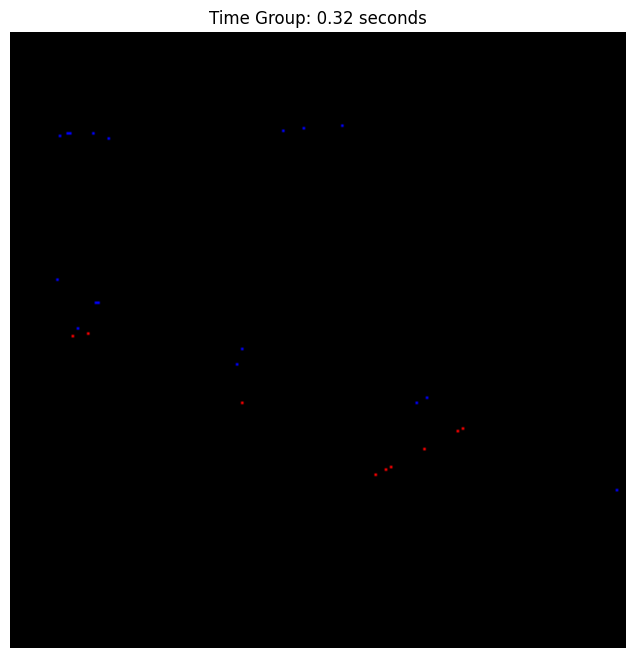

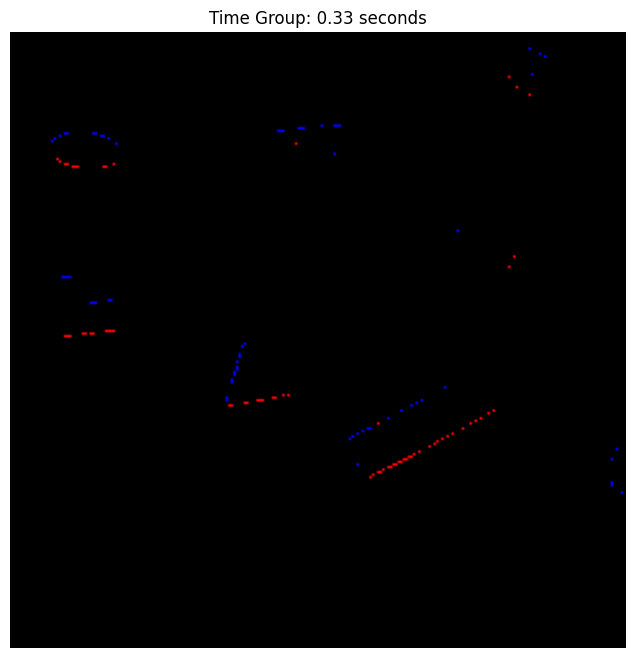

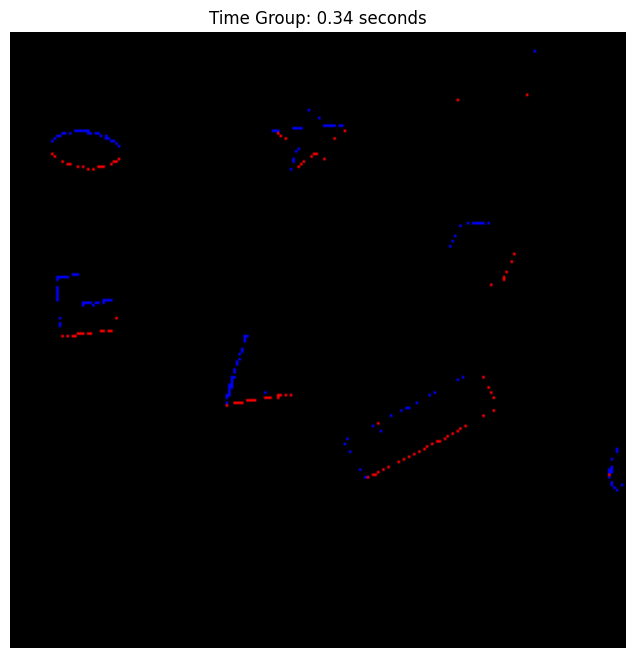

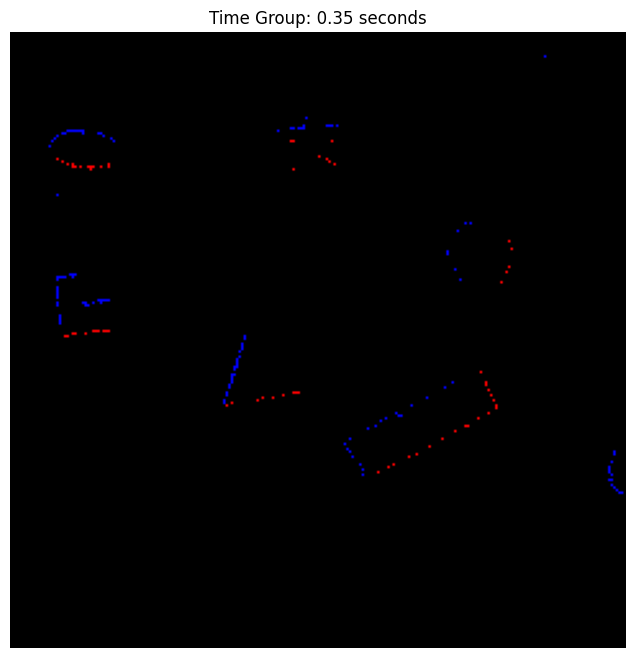

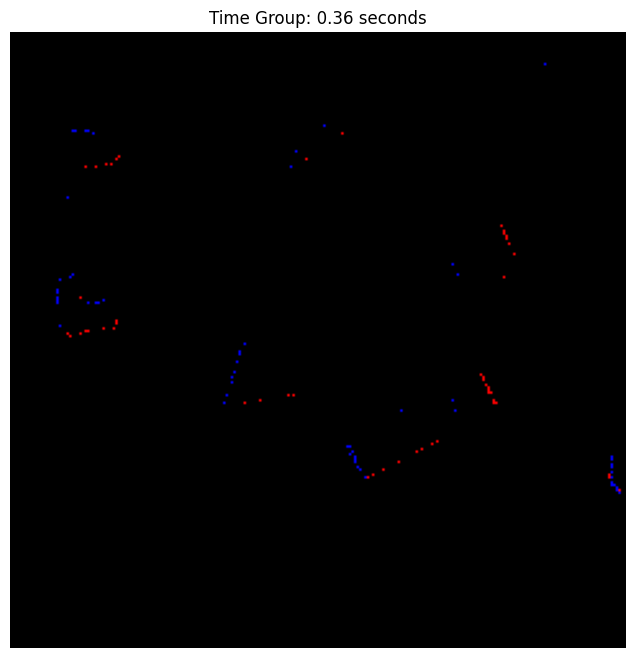

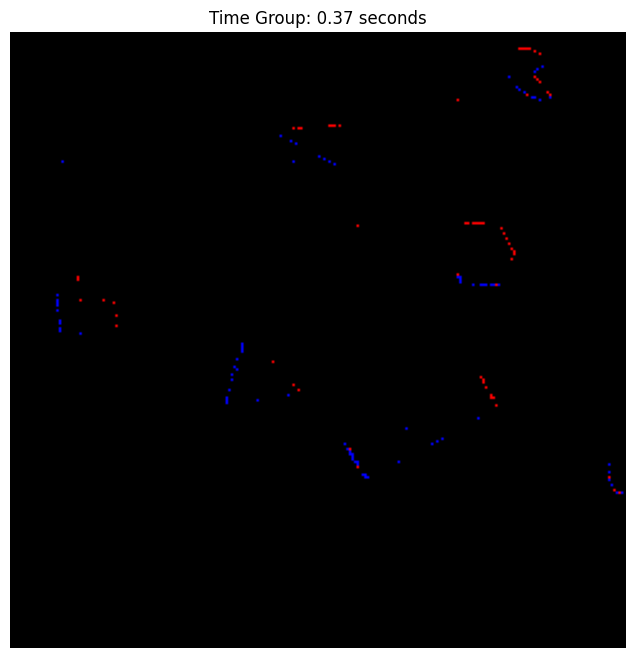

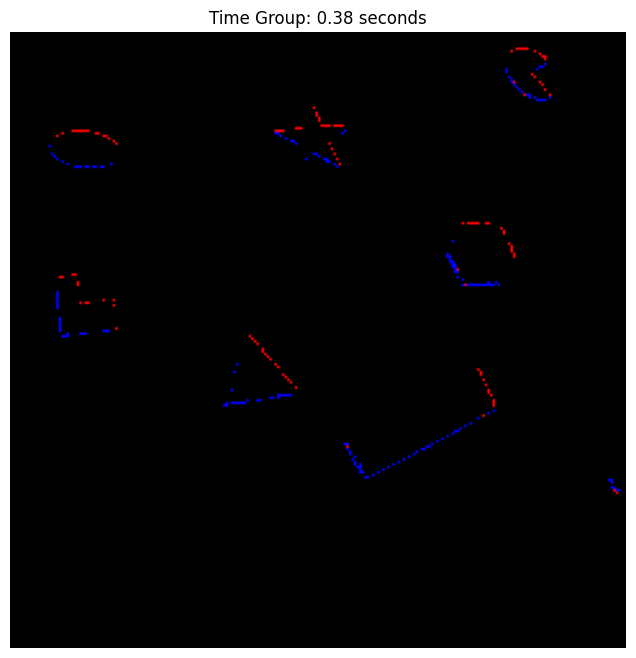

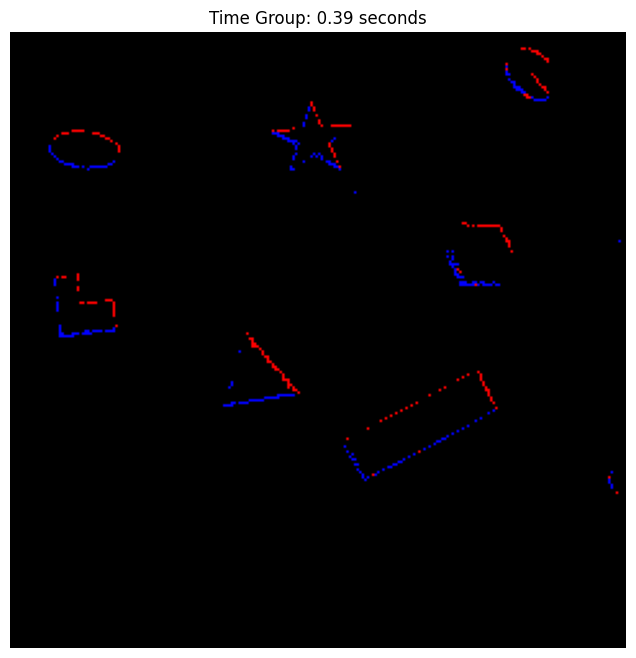

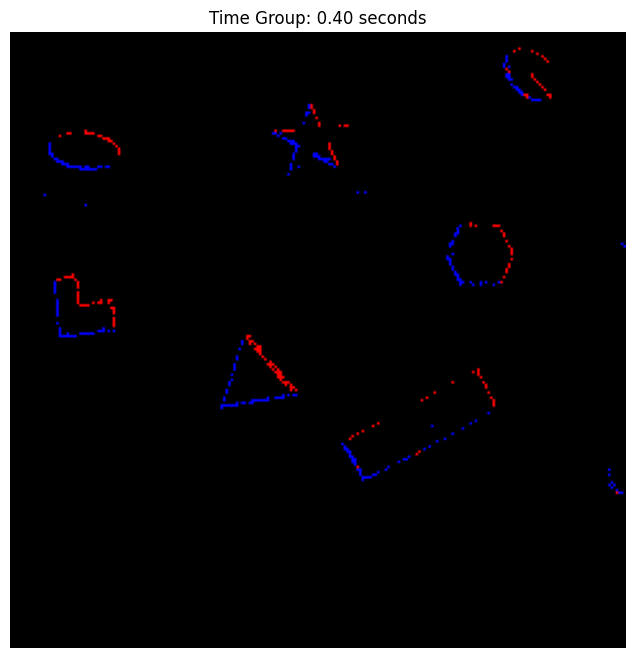

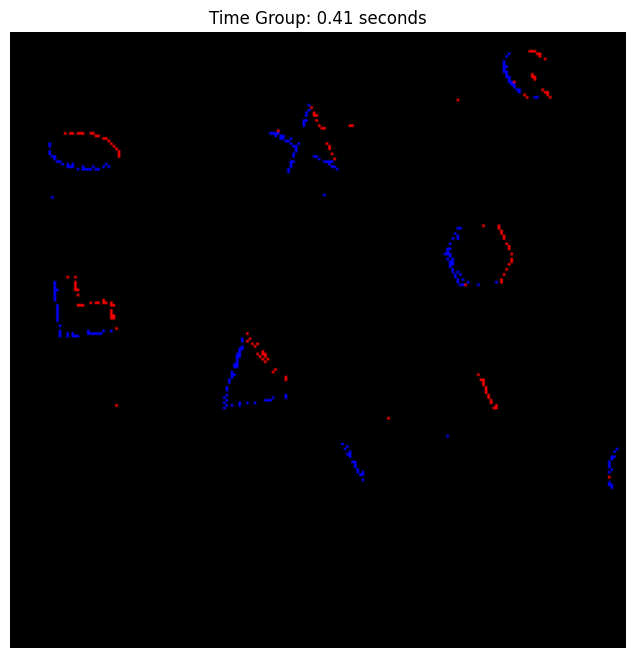

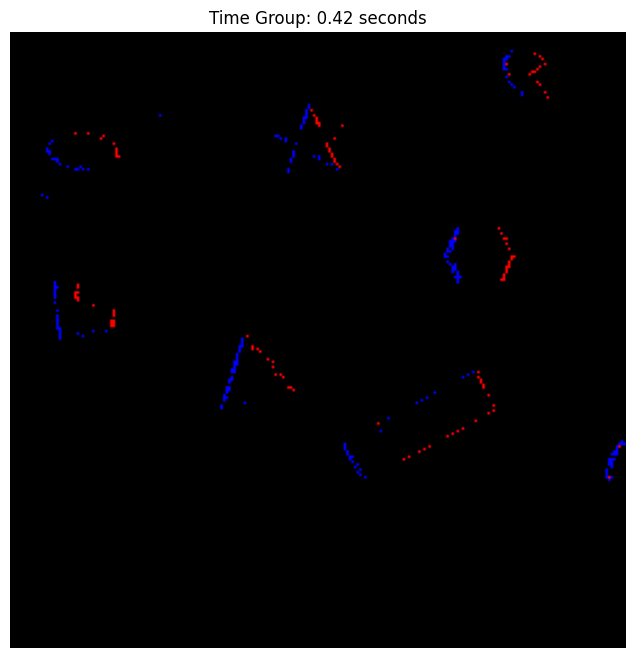

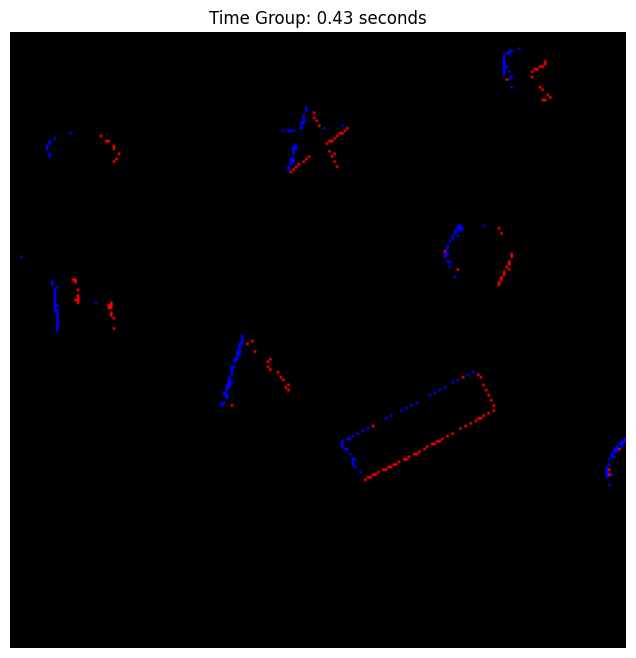

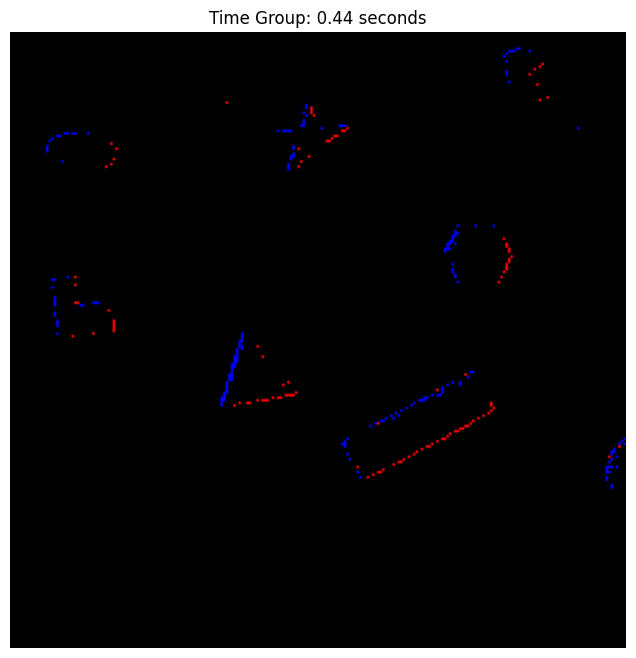

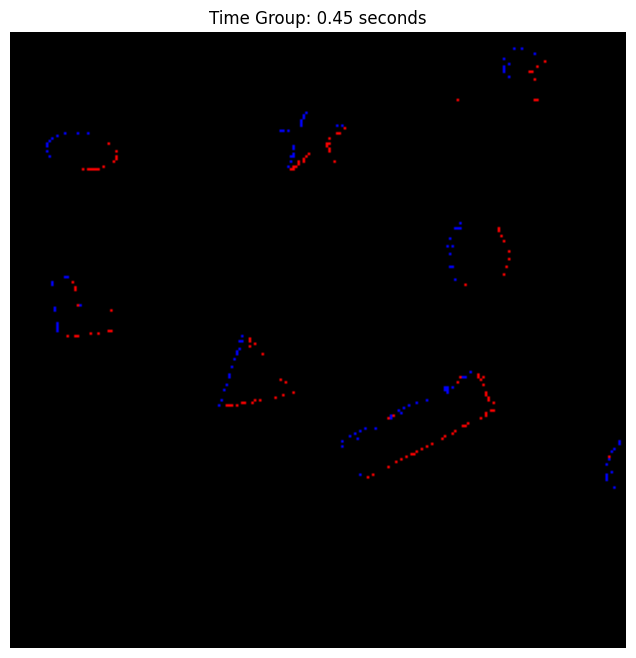

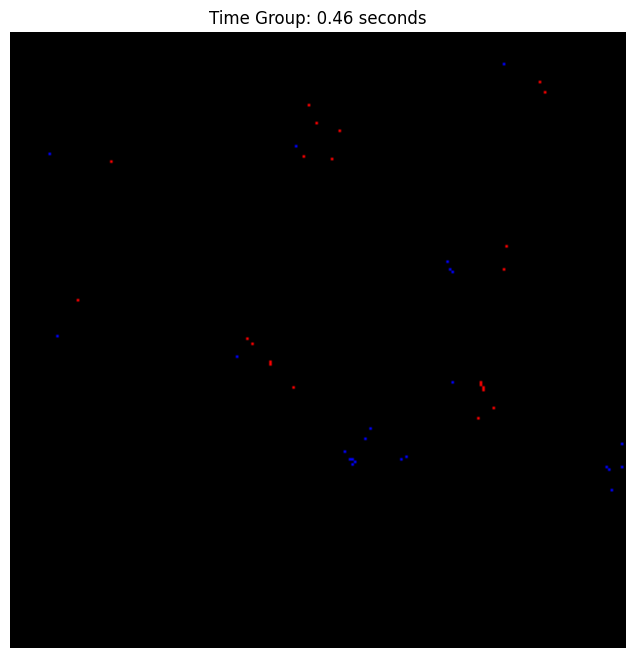

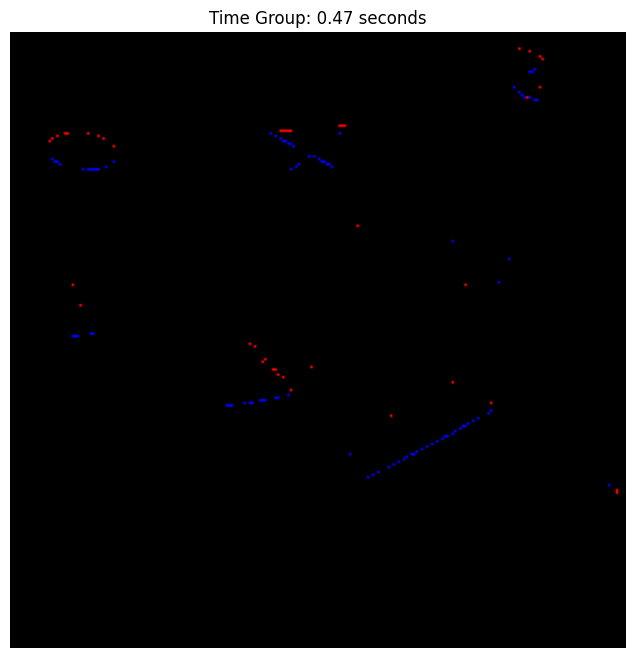

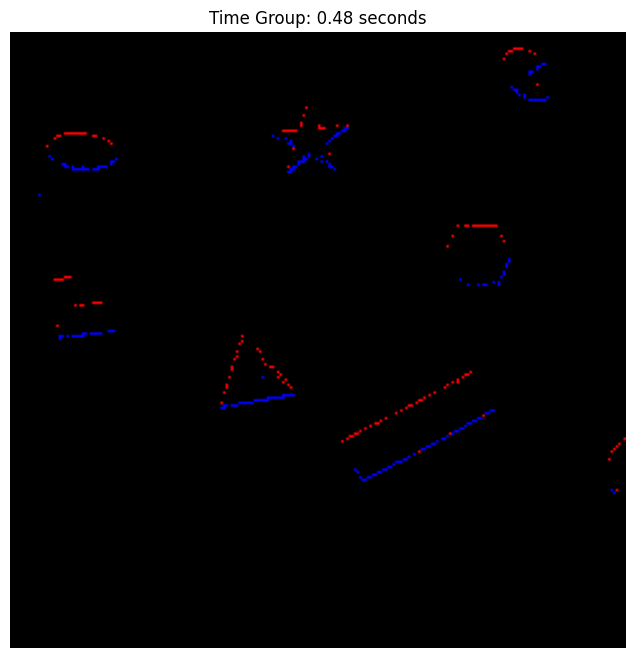

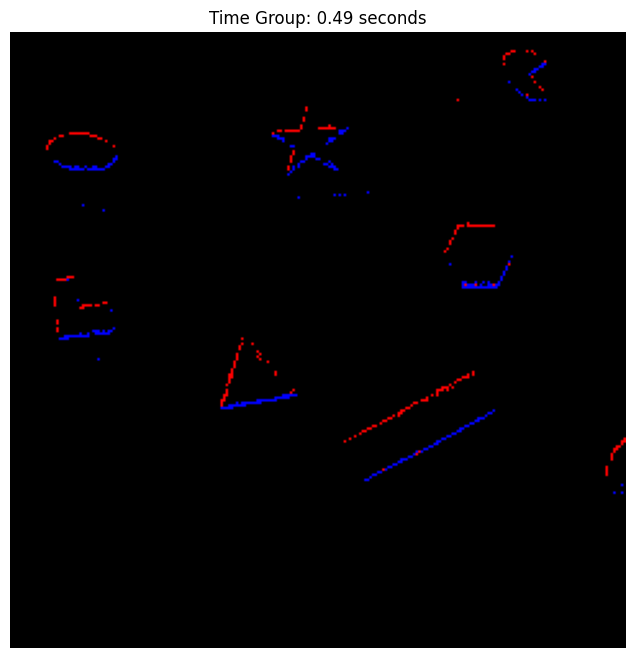

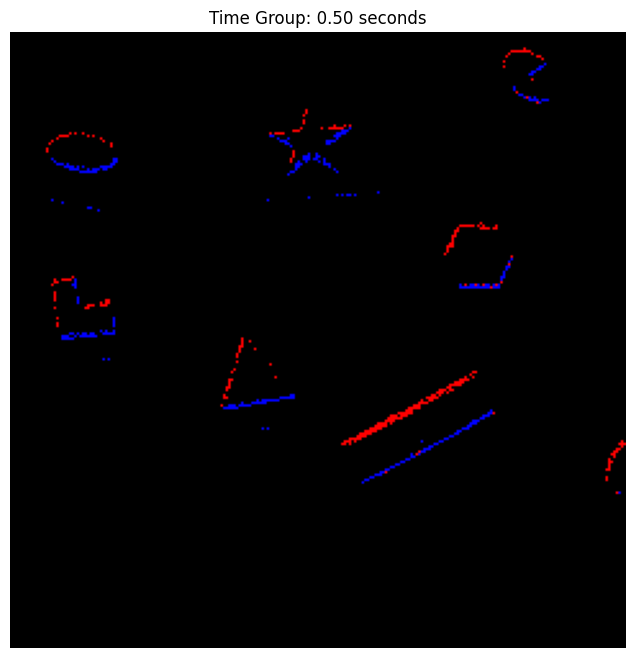

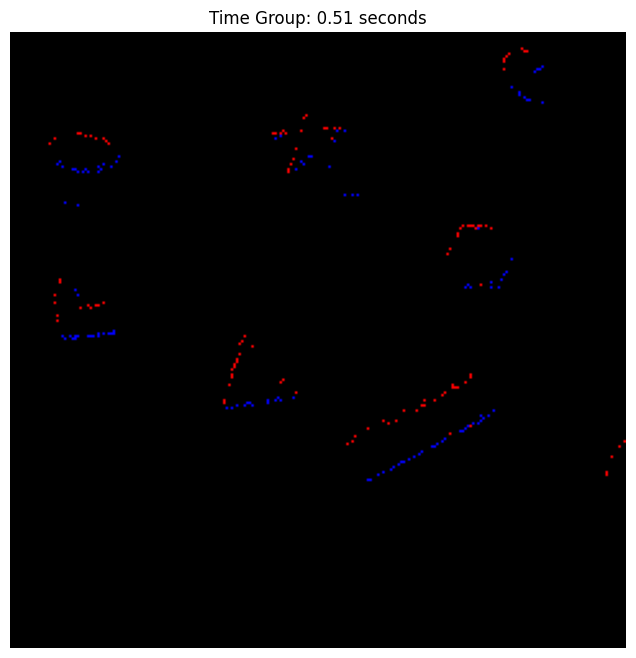

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

# Read the events.txt file (you can upload the file to your Colab environment)
file_path = '/content/events.txt'  # Update this with your file path
events = pd.read_csv(file_path, header=None, delim_whitespace=True)
events.columns = ['timestamp', 'x', 'y', 'polarity']

# Group events by 100th of a second (round timestamp to the nearest 0.01)
events['time_group'] = (events['timestamp'] * 100).astype(int)

# Create a dictionary to store events grouped by time group
grouped_events = defaultdict(list)
for _, row in events.iterrows():
    grouped_events[row['time_group']].append(row)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Define image size (assuming 240x240 pixels for DVS camera)
image_size = (240, 240)

# Iterate over each time group and plot the events
for time_group, event_list in grouped_events.items():
    # Create a blank image
    image = np.zeros(image_size)

    # Loop through events and update image with corresponding color
    for event in event_list:
        x, y, polarity = int(event['x']), int(event['y']), event['polarity']  # Ensure x, y are integers

        # Bounds check: Ensure the coordinates are within the image size
        if 0 <= x < image_size[1] and 0 <= y < image_size[0]:
            if polarity == 1:
                image[y, x] = 255  # Red pixel (for positive polarity)
            else:
                image[y, x] = -255  # Blue pixel (for negative polarity)

    # Convert the image to RGB for plotting with color mapping
    img_rgb = np.zeros((image_size[0], image_size[1], 3), dtype=np.uint8)
    img_rgb[image == 255] = [255, 0, 0]  # Red for positive polarity
    img_rgb[image == -255] = [0, 0, 255]  # Blue for negative polarity

    # Explicitly create a new figure each time
    plt.figure(figsize=(8, 8))

    # Plot the new image
    plt.imshow(img_rgb)
    plt.title(f'Time Group: {time_group / 100:.2f} seconds')
    plt.axis('off')  # Hide the axes for better visualization

    # Display the image and pause briefly to show it
    plt.draw()
    plt.pause(0.1)

plt.show()


<ipython-input-3-0cdf731a4e0c>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  events = pd.read_csv(file_path, header=None, delim_whitespace=True)


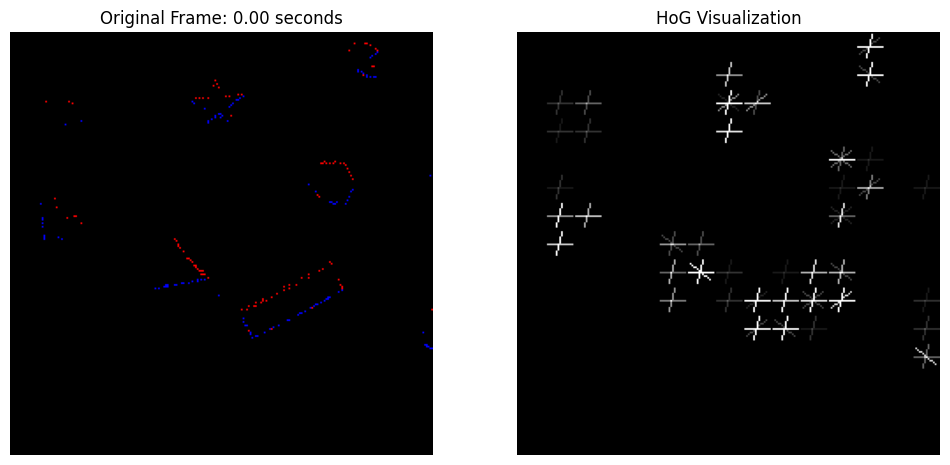

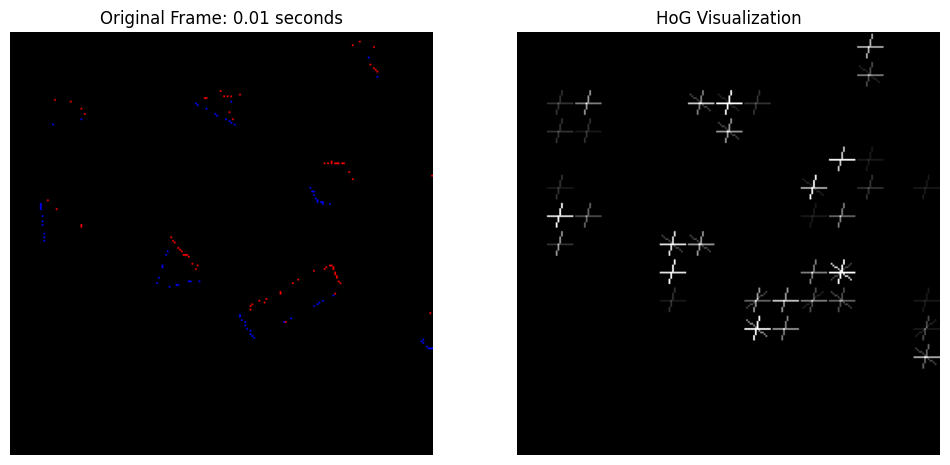

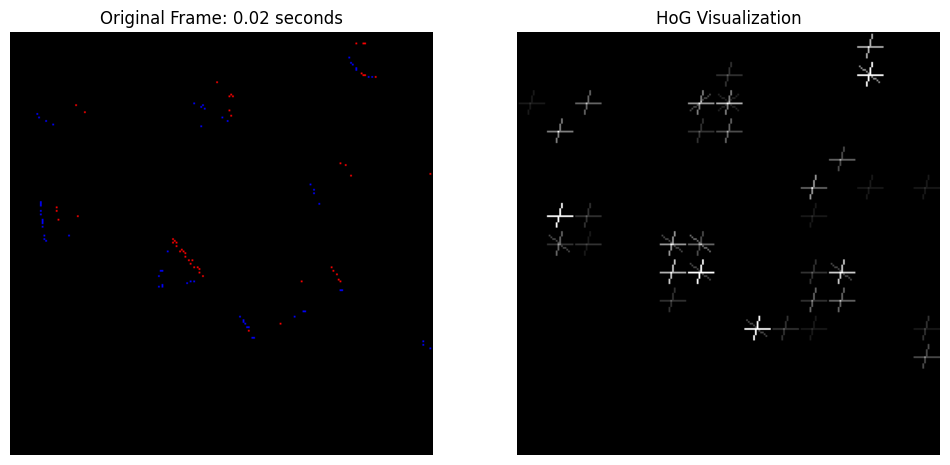

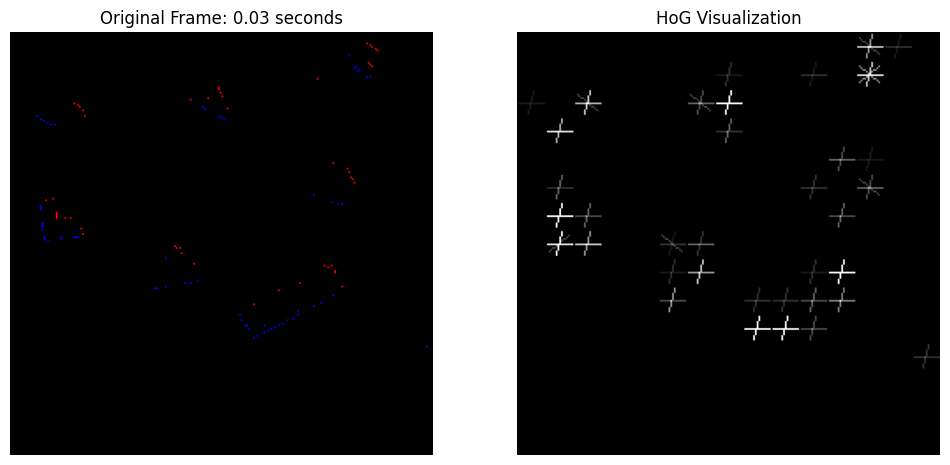

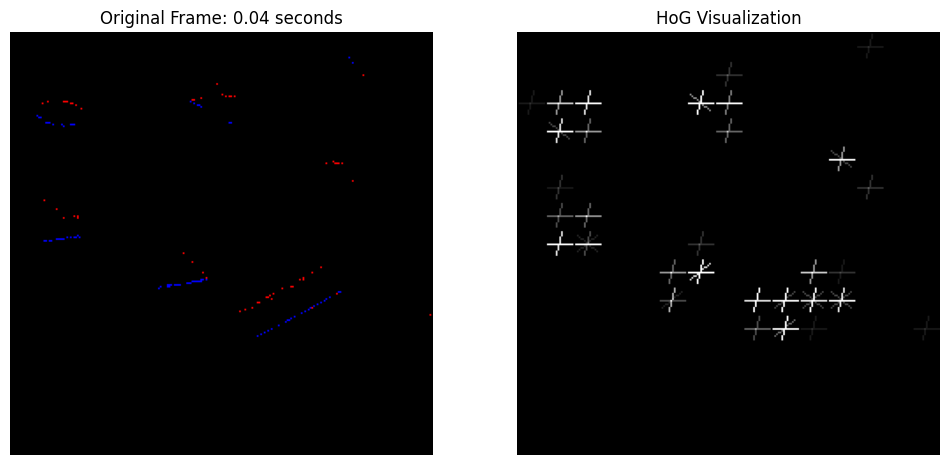

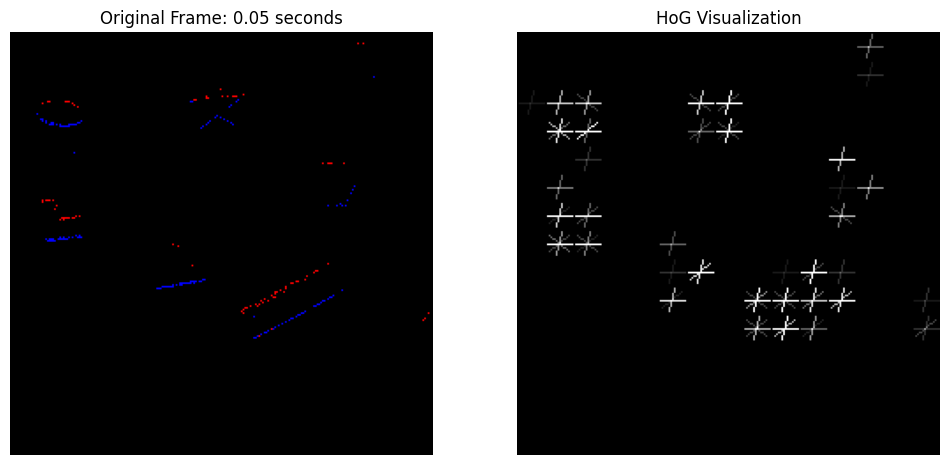

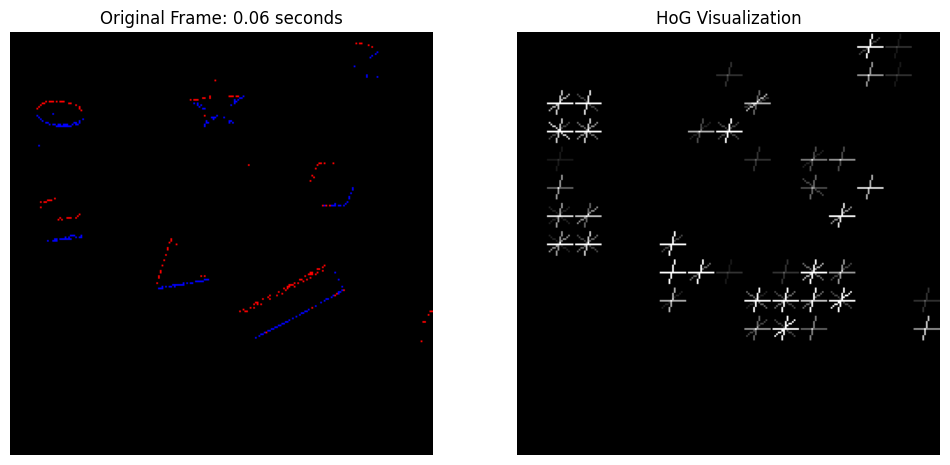

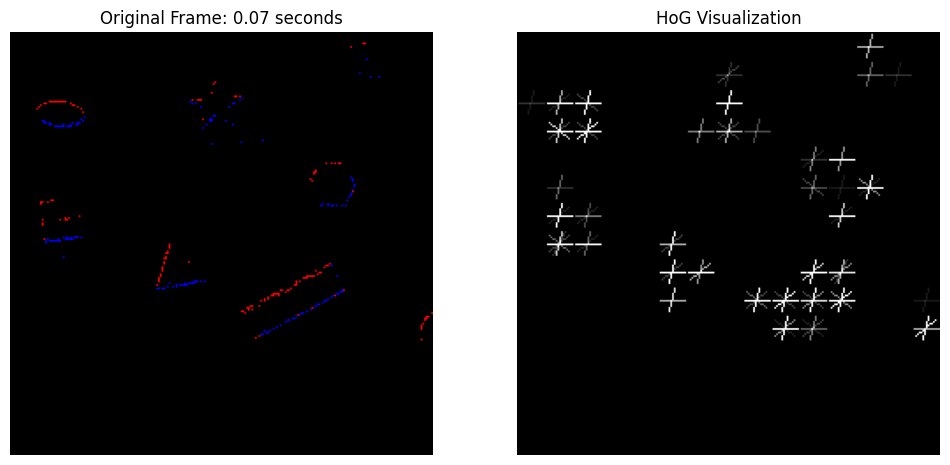

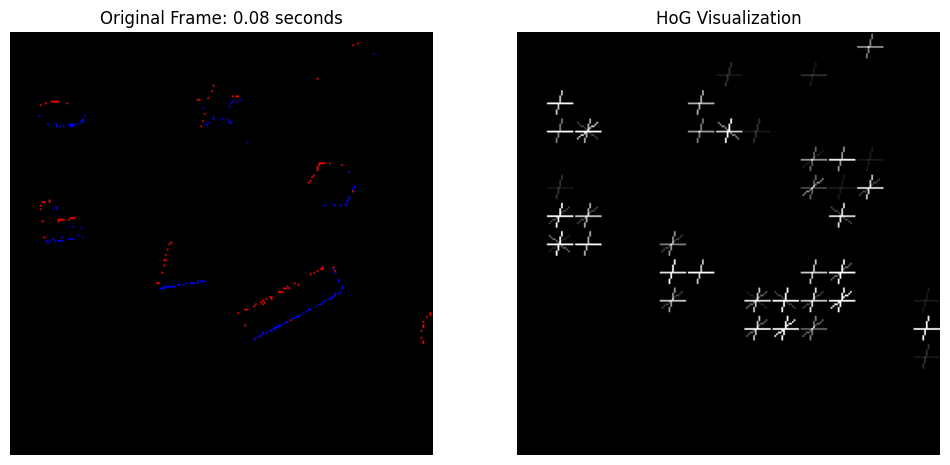

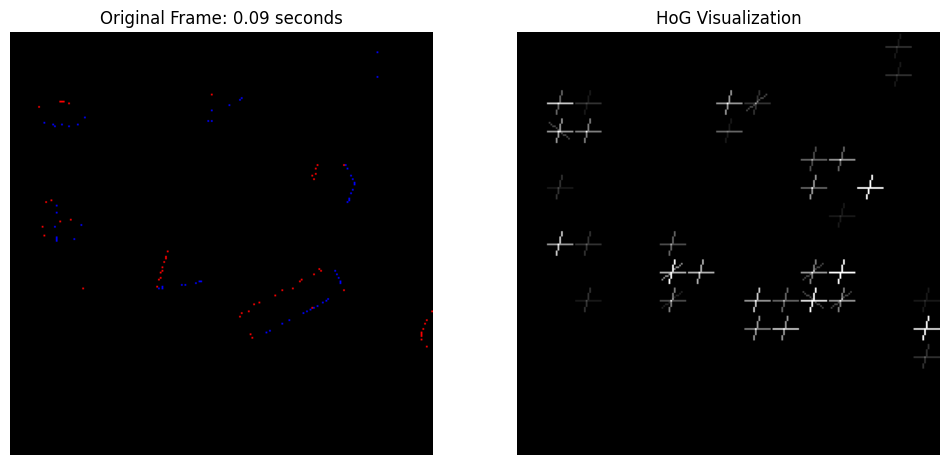

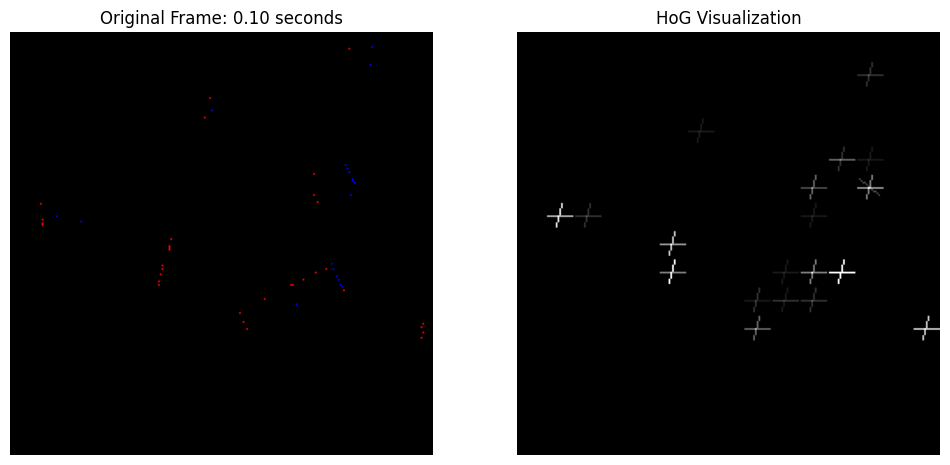

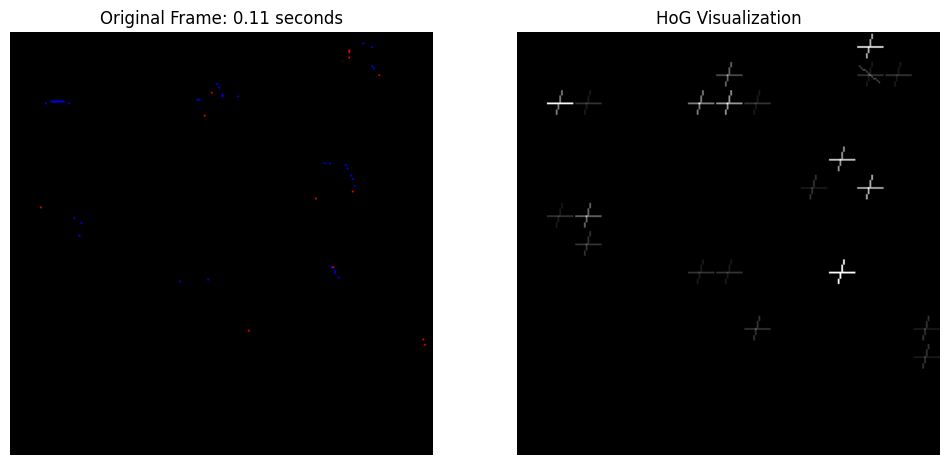

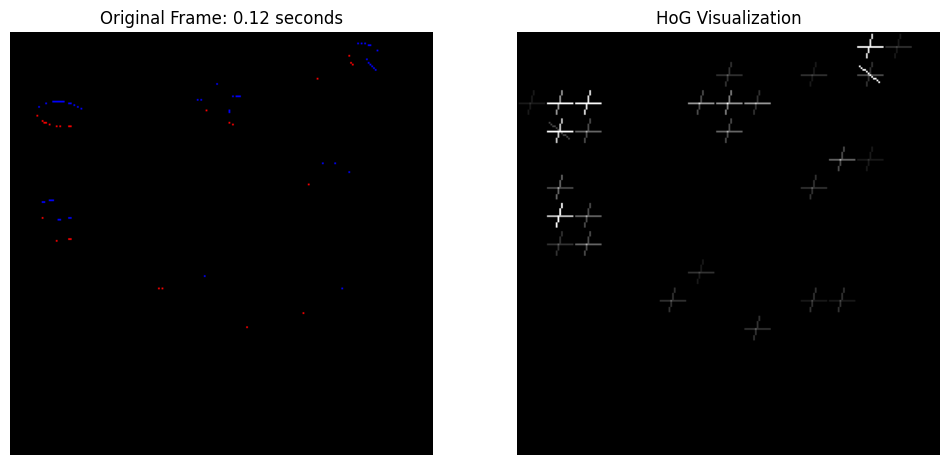

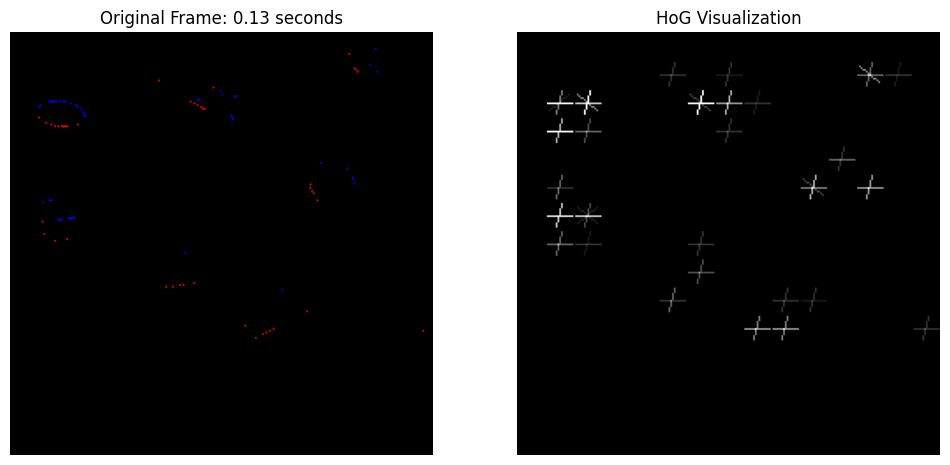

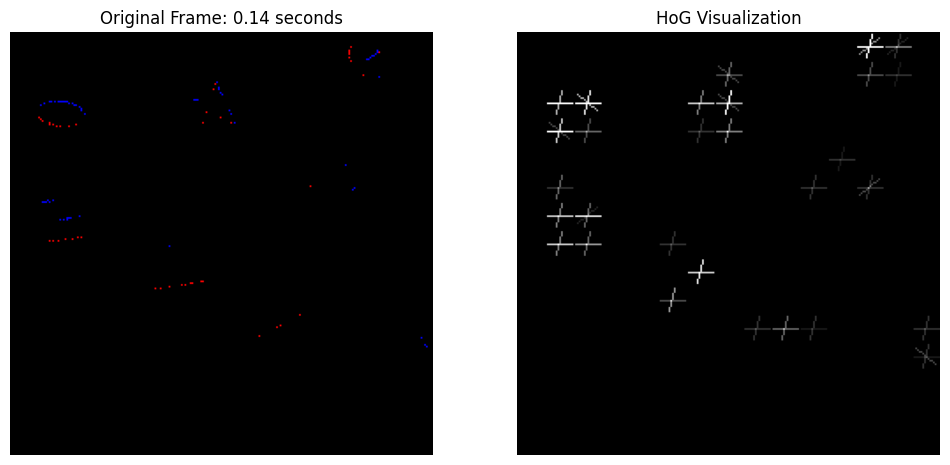

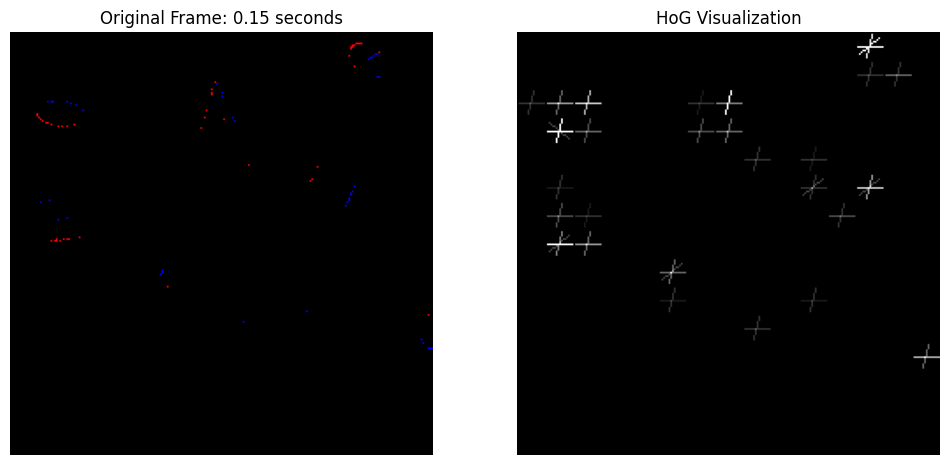

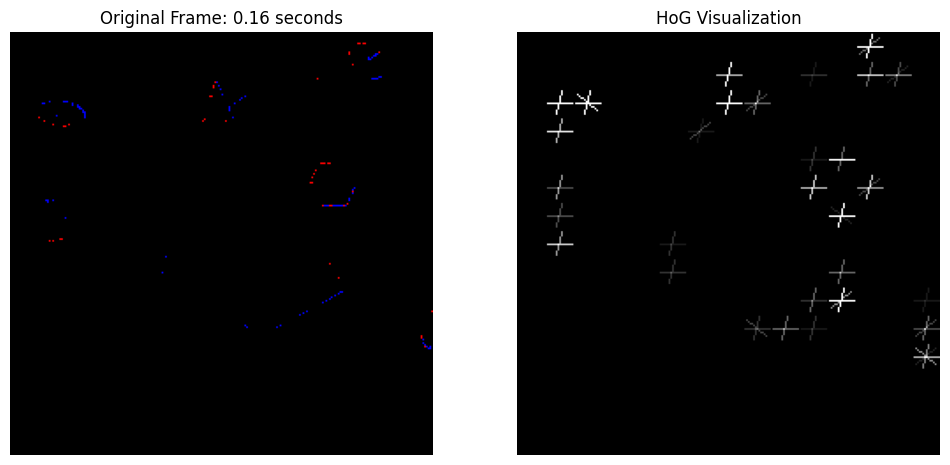

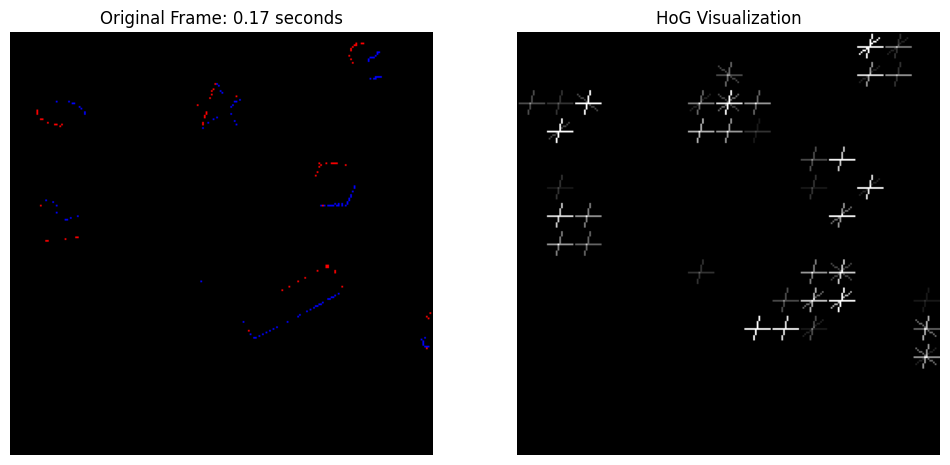

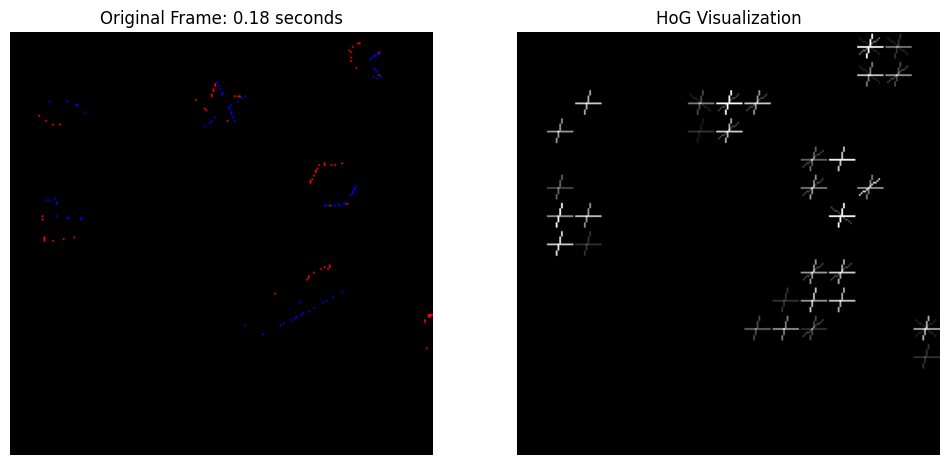

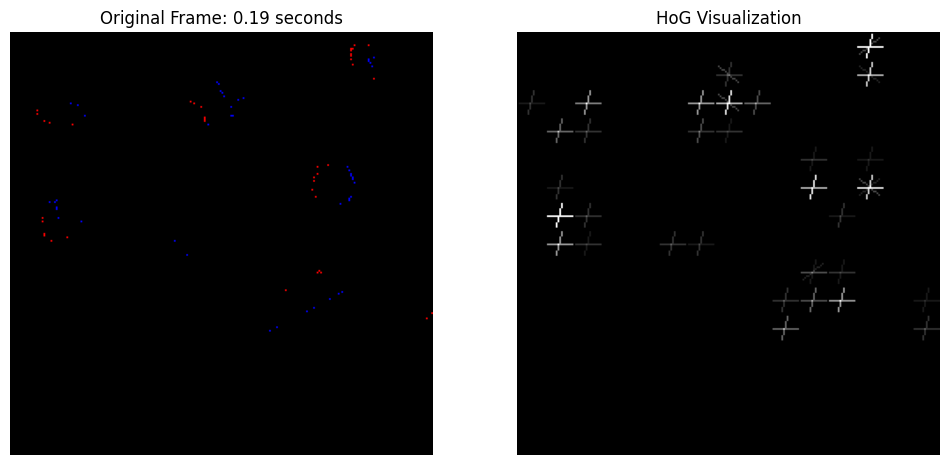

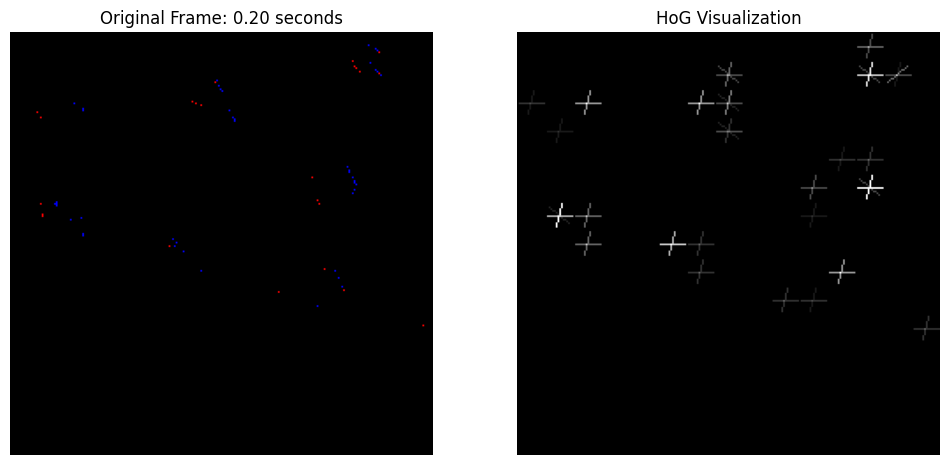

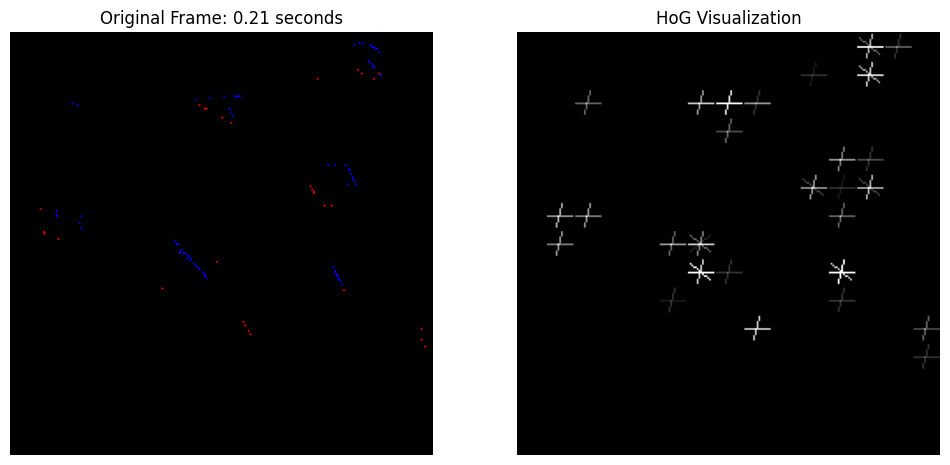

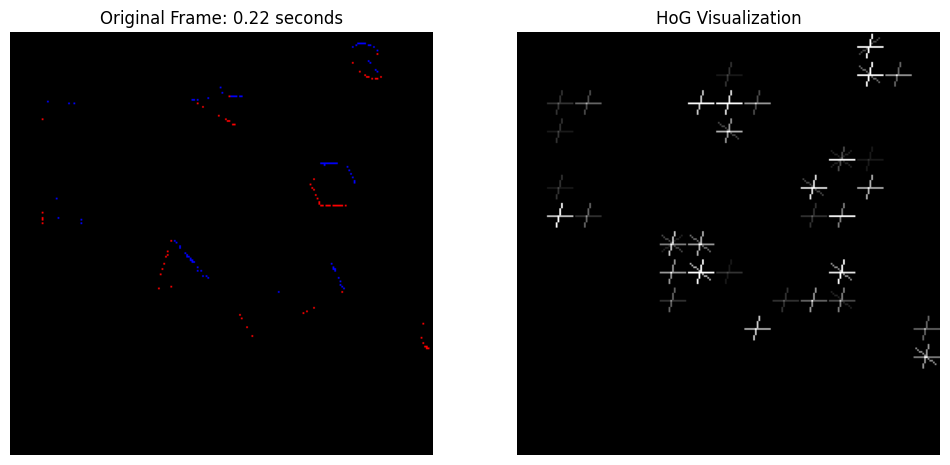

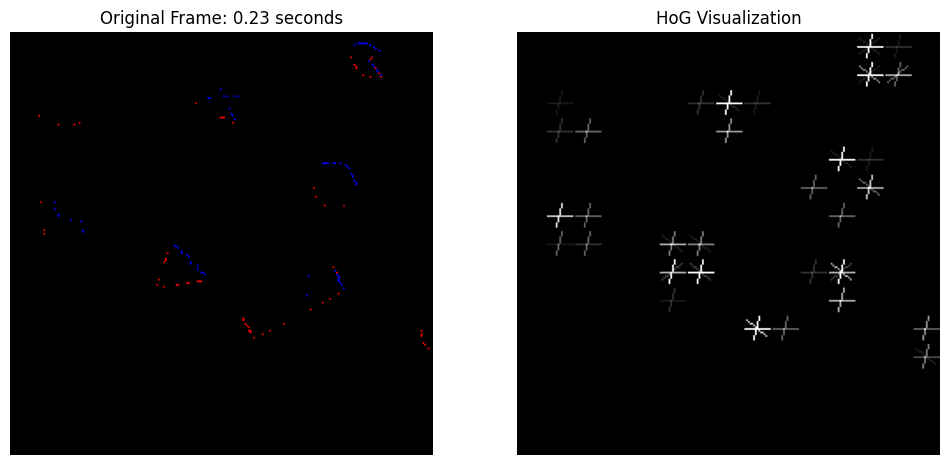

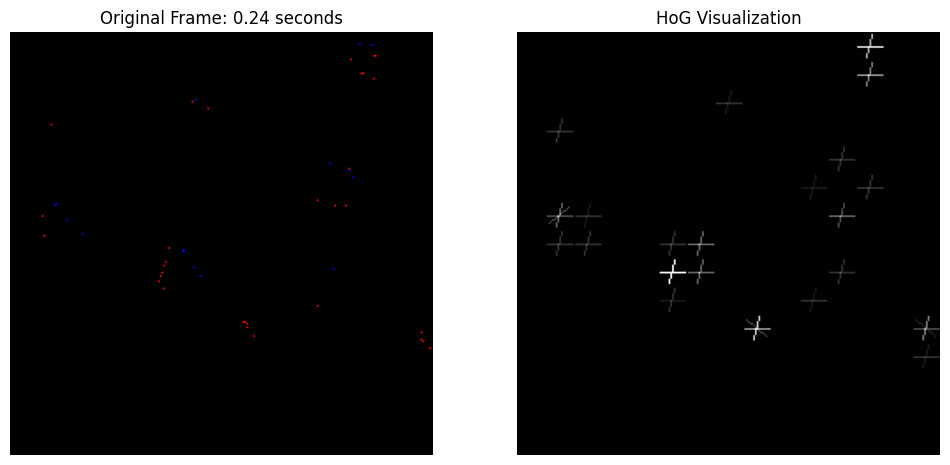

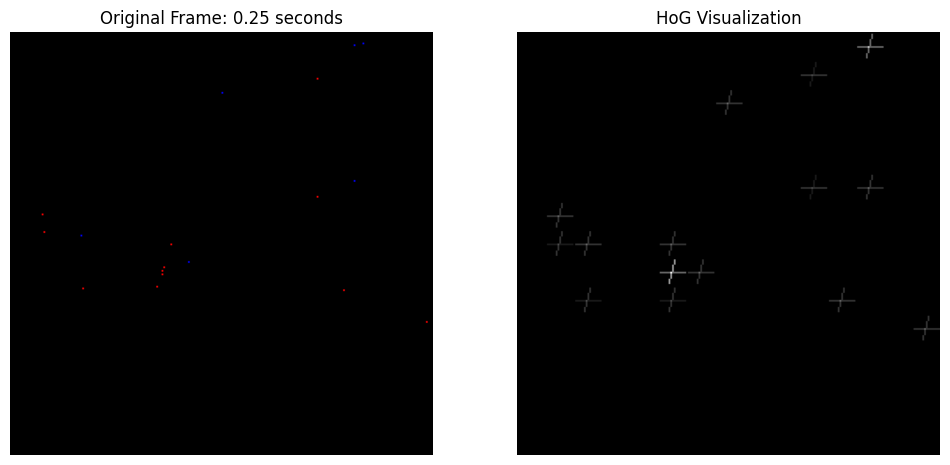

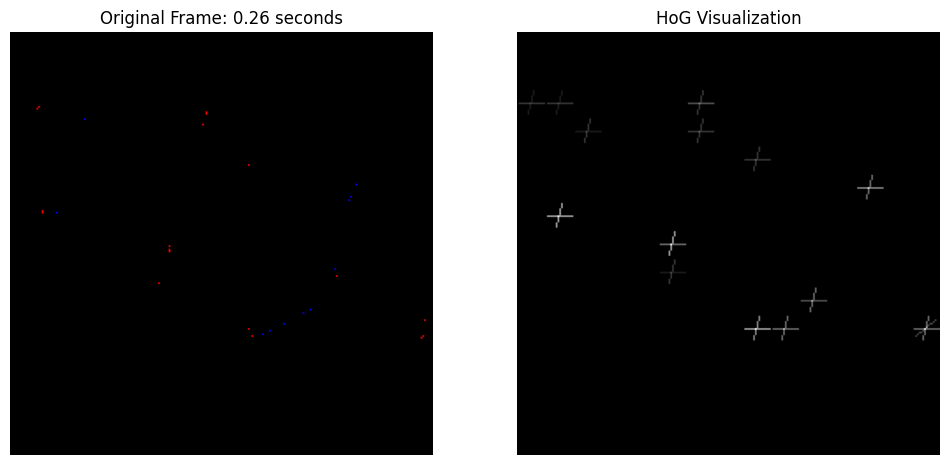

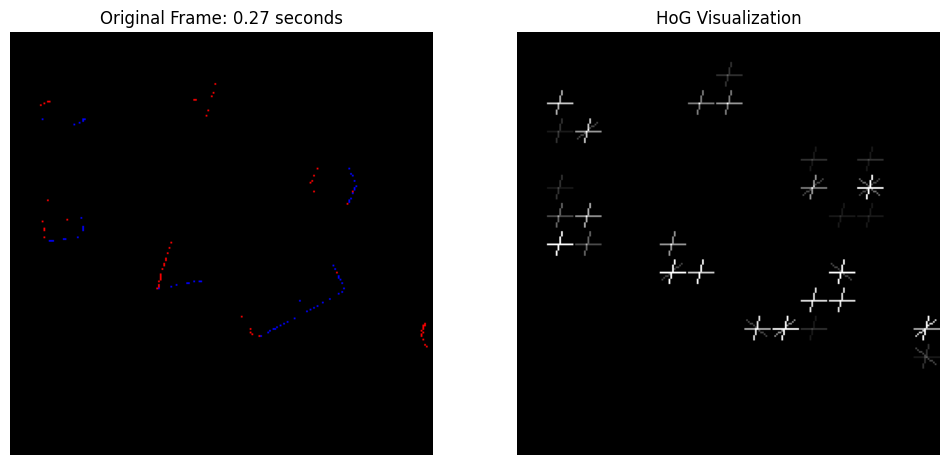

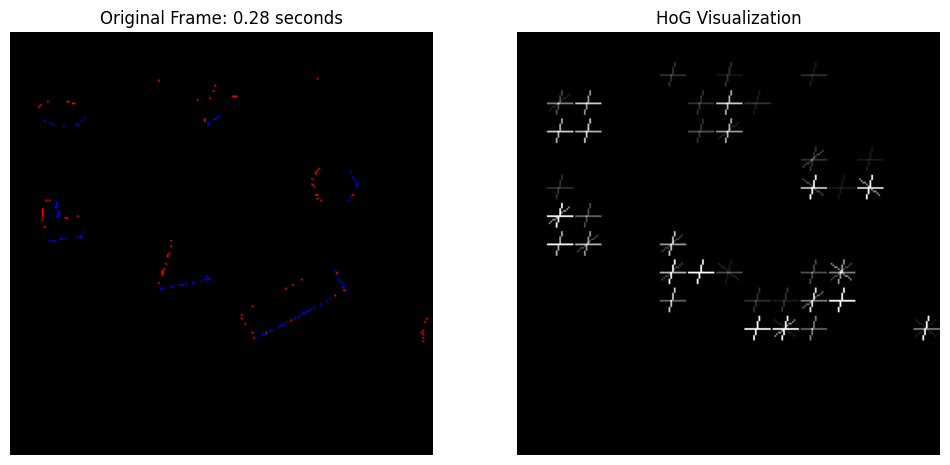

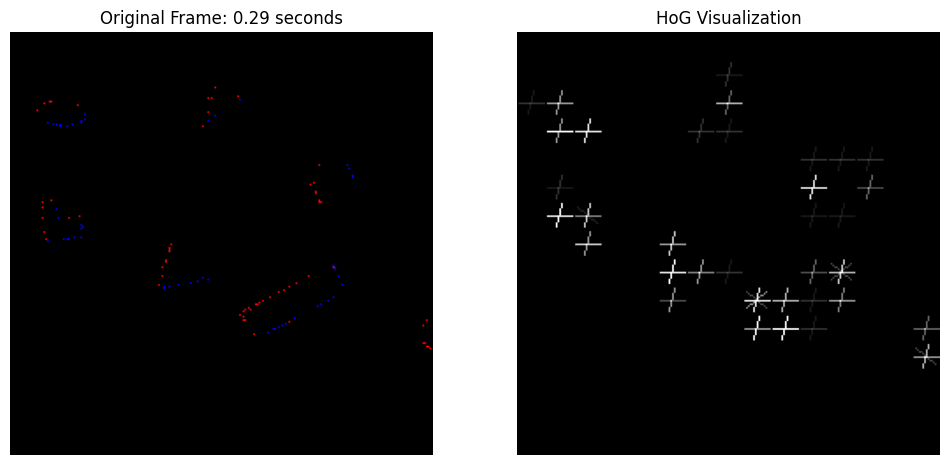

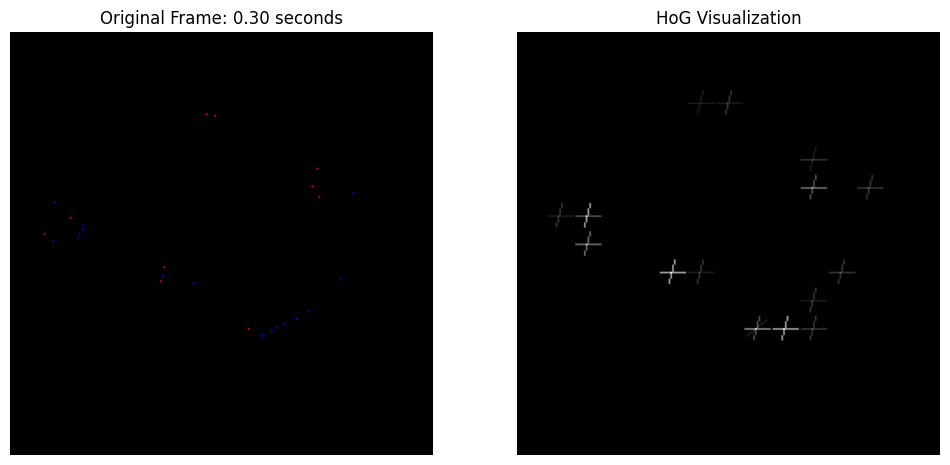

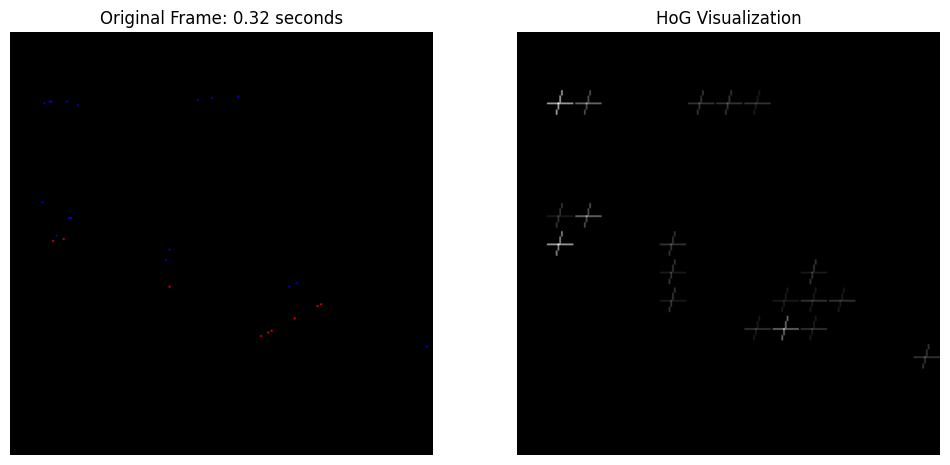

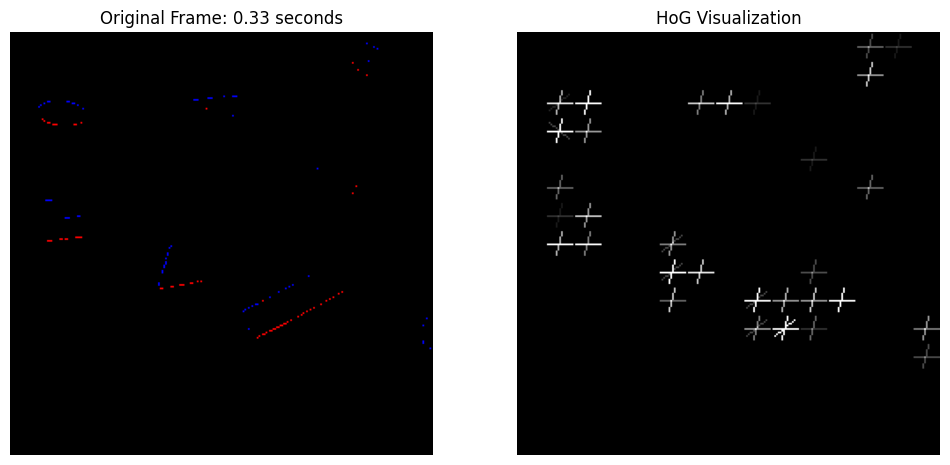

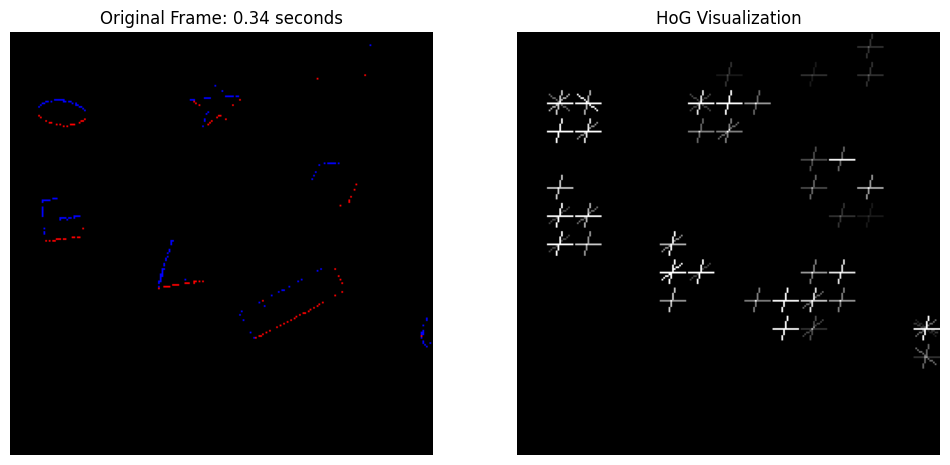

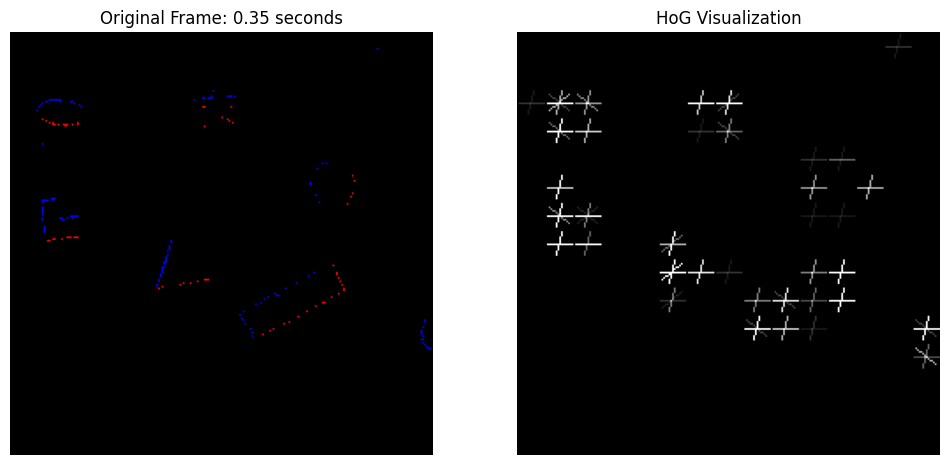

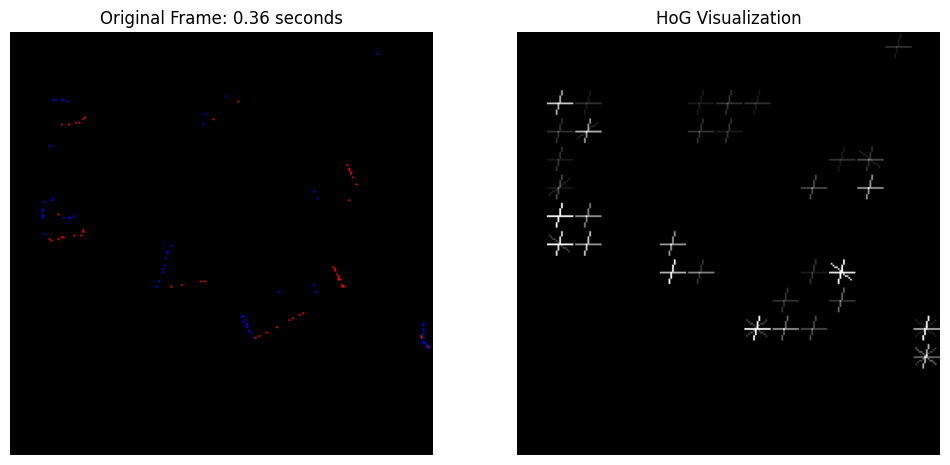

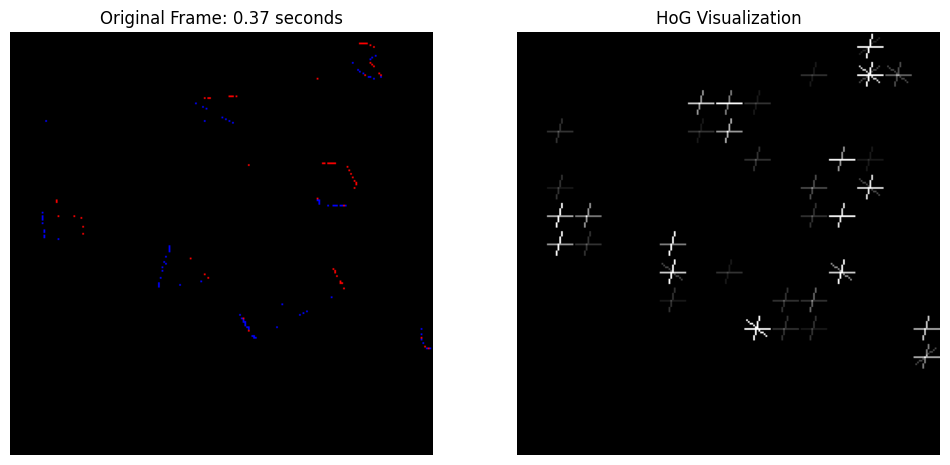

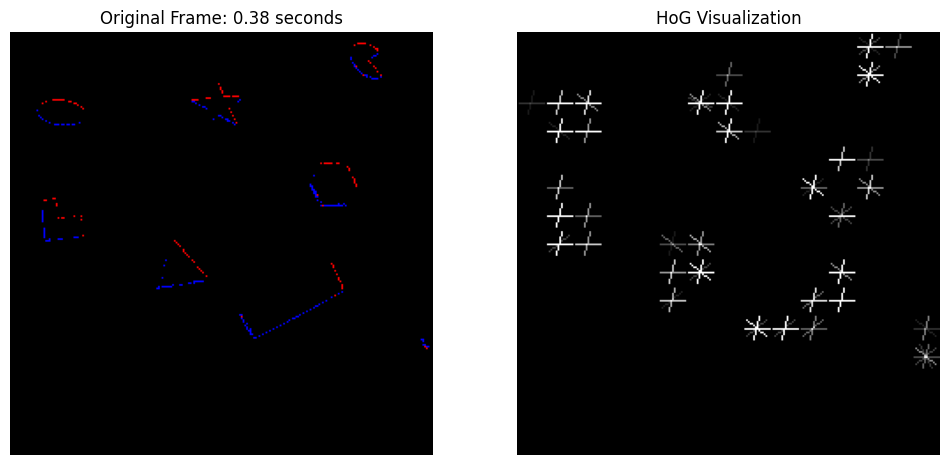

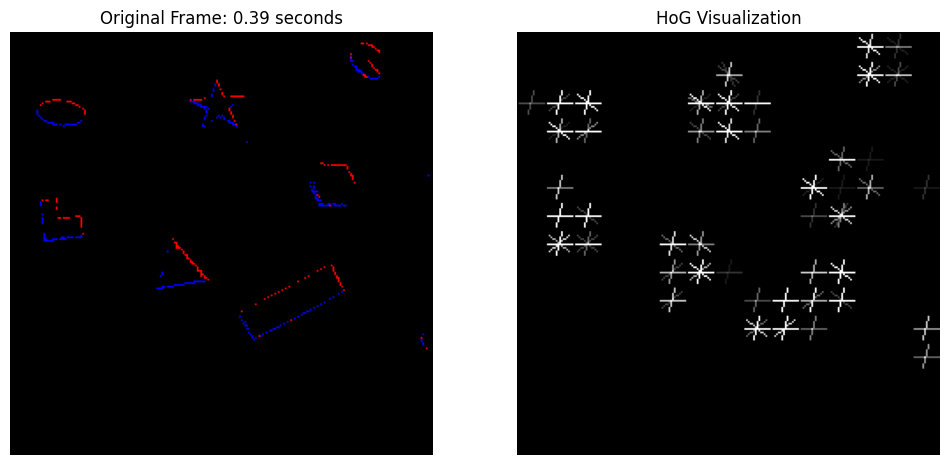

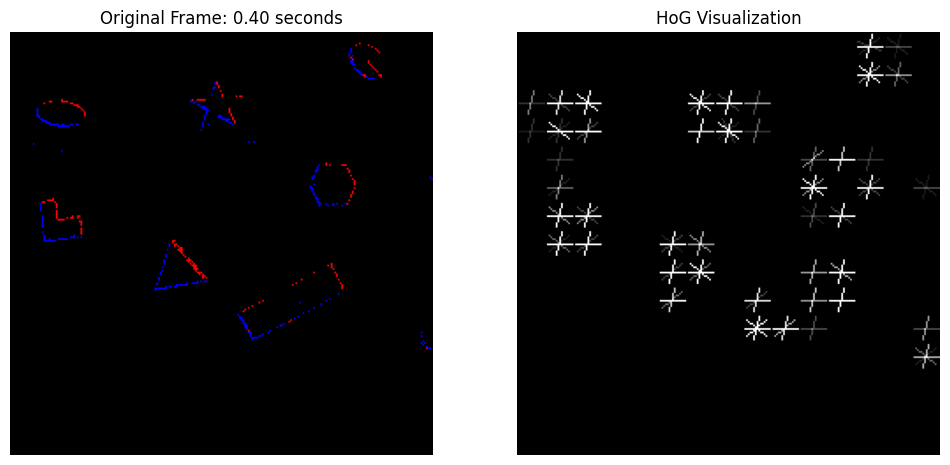

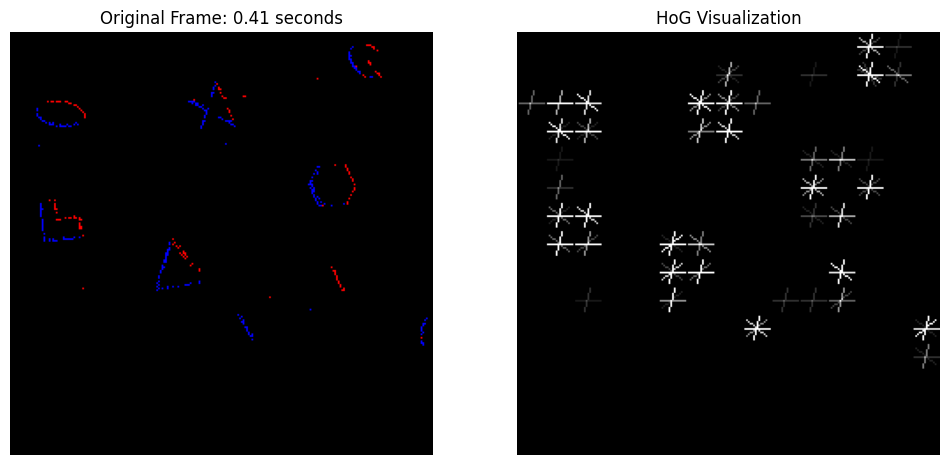

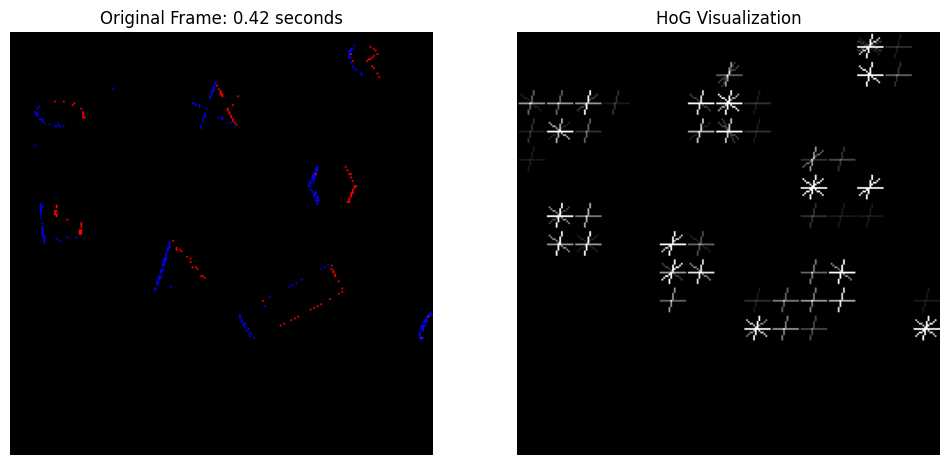

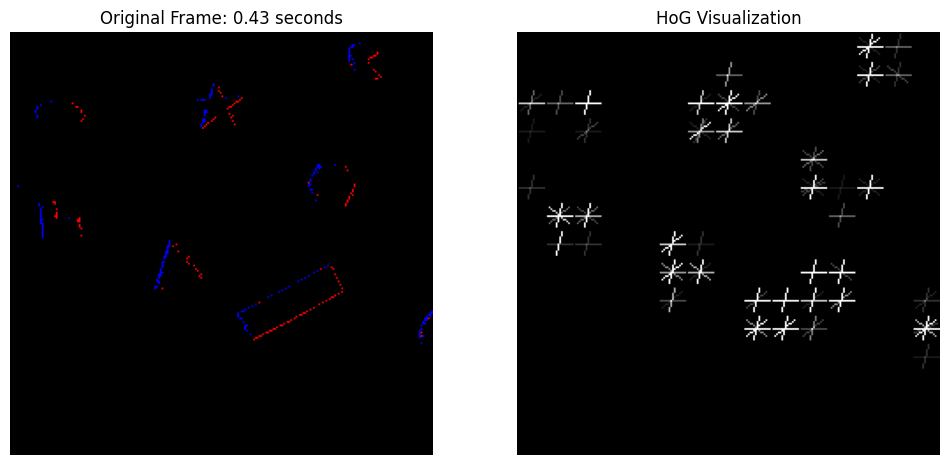

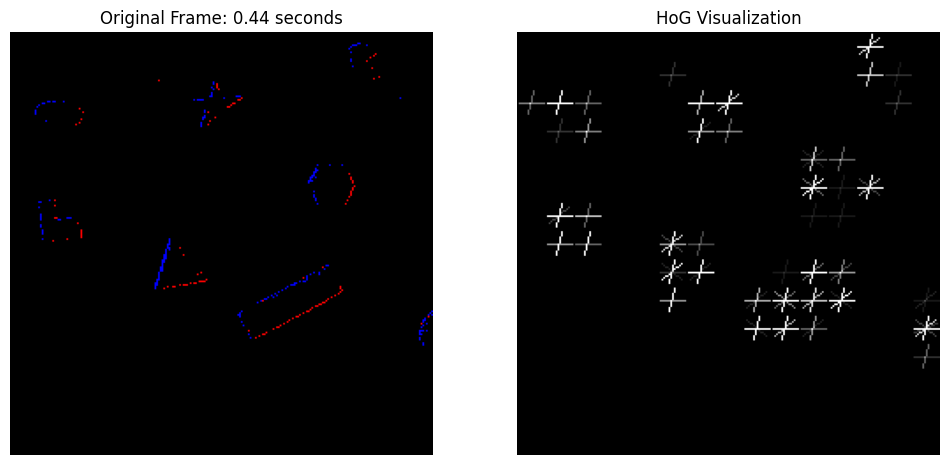

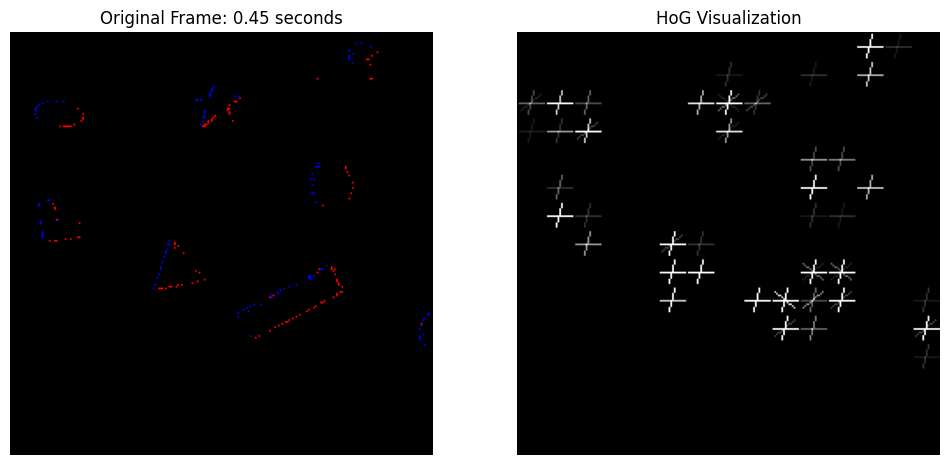

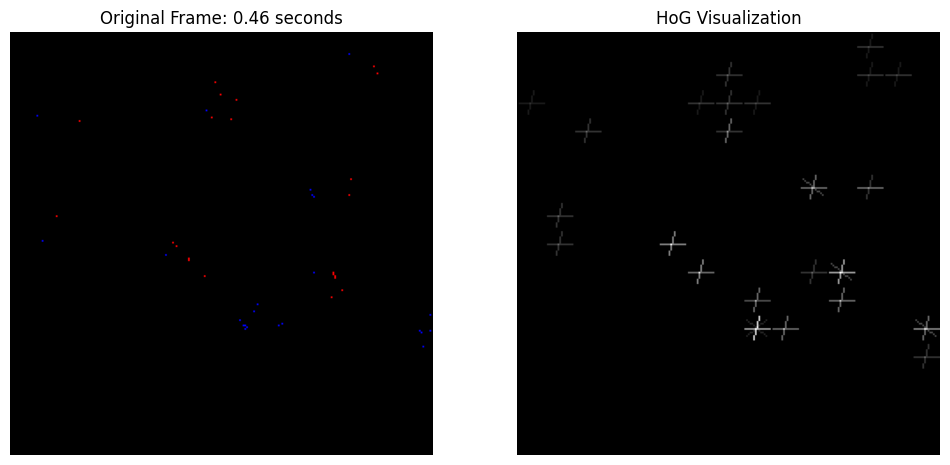

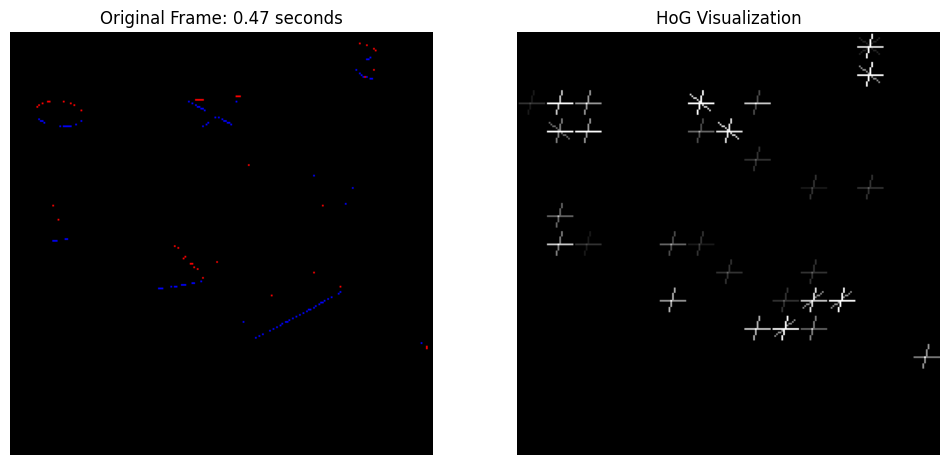

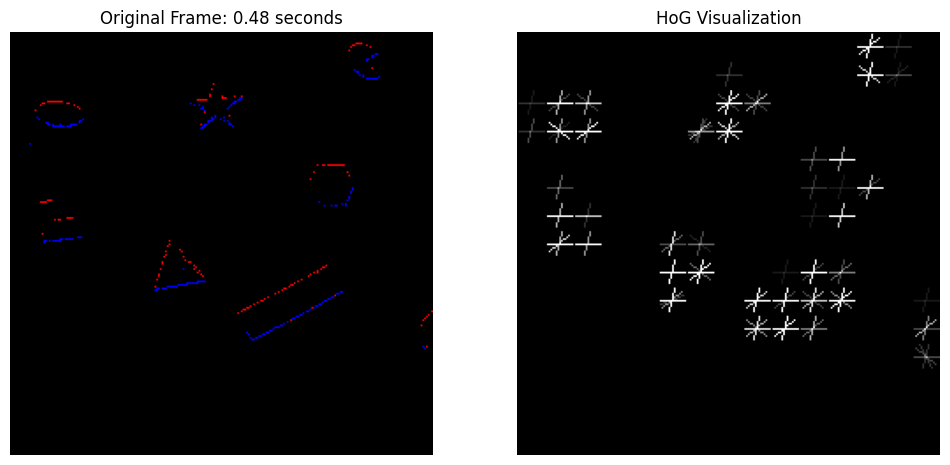

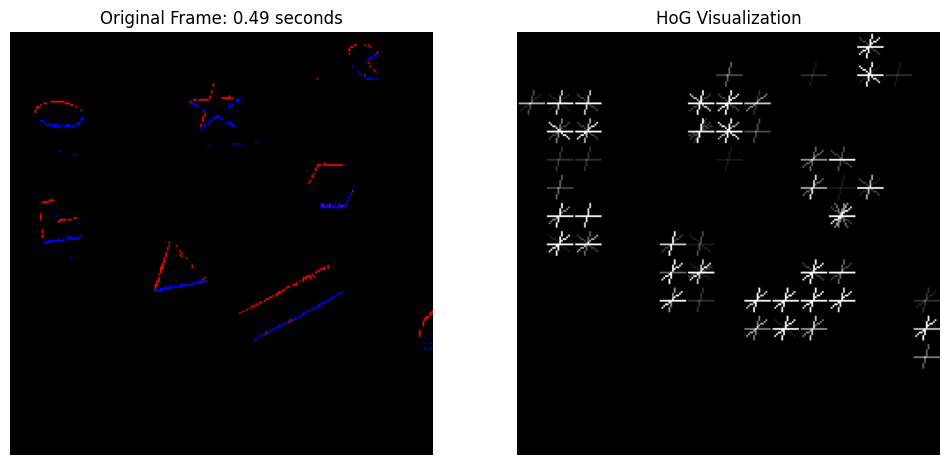

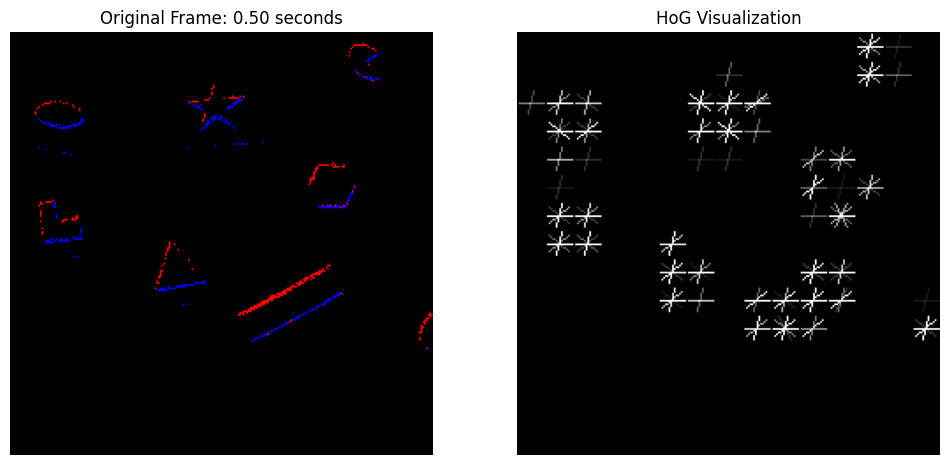

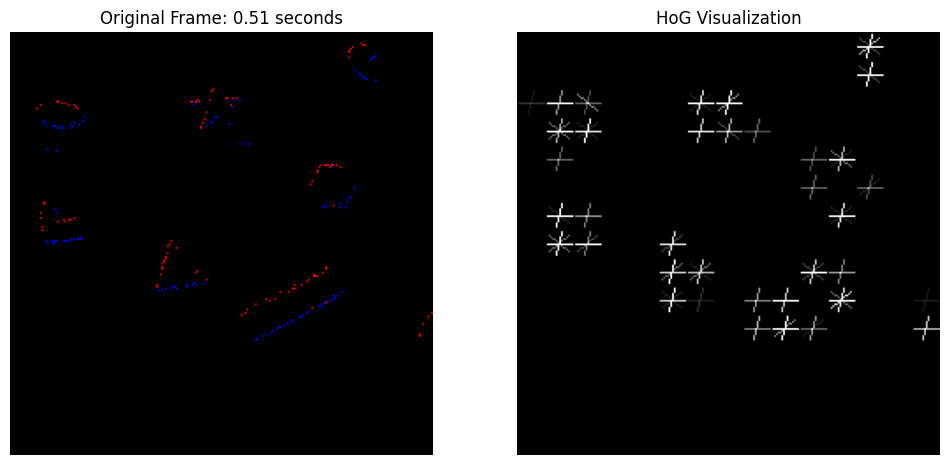

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.feature import hog
from skimage import exposure
from collections import defaultdict

# Read the events.txt file
file_path = '/content/events.txt'  # Update this with your file path
events = pd.read_csv(file_path, header=None, delim_whitespace=True)
events.columns = ['timestamp', 'x', 'y', 'polarity']

# Group events by 100th of a second (round timestamp to the nearest 0.01)
events['time_group'] = (events['timestamp'] * 100).astype(int)

# Create a dictionary to store events grouped by time group
grouped_events = defaultdict(list)
for _, row in events.iterrows():
    grouped_events[row['time_group']].append(row)

# Set up image size (assuming 240x240 pixels for DVS camera)
image_size = (240, 240)

# Patch size for HoG (e.g., 16x16 pixels)
patch_size = 16

# Iterate over each time group and process the events
for time_group, event_list in grouped_events.items():
    # Create a blank image
    image = np.zeros(image_size)

    # Loop through events and update image with corresponding color
    for event in event_list:
        x, y, polarity = int(event['x']), int(event['y']), event['polarity']  # Ensure x, y are integers

        # Bounds check: Ensure the coordinates are within the image size
        if 0 <= x < image_size[1] and 0 <= y < image_size[0]:
            if polarity == 1:
                image[y, x] = 255  # Red pixel (for positive polarity)
            else:
                image[y, x] = -255  # Blue pixel (for negative polarity)

    # Convert the image to RGB for plotting with color mapping
    img_rgb = np.zeros((image_size[0], image_size[1], 3), dtype=np.uint8)
    img_rgb[image == 255] = [255, 0, 0]  # Red for positive polarity
    img_rgb[image == -255] = [0, 0, 255]  # Blue for negative polarity

    # Divide the image into patches and compute HoG for each
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot original image
    axes[0].imshow(img_rgb)
    axes[0].set_title(f'Original Frame: {time_group / 100:.2f} seconds')
    axes[0].axis('off')

    # Prepare the HoG visualization
    hog_image_total = np.zeros_like(image, dtype=float)

    # Loop through patches
    for i in range(0, image_size[0], patch_size):
        for j in range(0, image_size[1], patch_size):
            # Extract the patch
            patch = image[i:i + patch_size, j:j + patch_size]

            # Compute HoG for the patch
            if patch.sum() != 0:  # Skip empty patches
                _, hog_image = hog(
                    patch,
                    pixels_per_cell=(patch_size, patch_size),
                    cells_per_block=(1, 1),
                    visualize=True,
                    feature_vector=False
                )
                # Normalize and add to the total HoG visualization
                hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
                hog_image_total[i:i + patch_size, j:j + patch_size] = hog_image_rescaled

    # Plot HoG visualization
    axes[1].imshow(hog_image_total, cmap='gray')
    axes[1].set_title('HoG Visualization')
    axes[1].axis('off')

    plt.show()
    plt.pause(0.1)  # Pause briefly to visualize the frame


1. What timefraame would be accurate
2. Do we also calulate angular and linear velocities(like in the original paper)?
3. Are we trying to detect linear motion, rotational motion or any kind of motion?
4. Which transformer to go with? - 1. ViT (Vision Transformer) by Google
5. How to embed the histogram into the transformer (most of the image is gonna be black, hence most 16 x 16 patche histograms gonna be 0
6. How to compare it wrt ground truth?

In [ ]:
import torchvision.transforms as transforms

class EventDataset(Dataset):
    def __init__(self, events, image_size=90, patch_size=16, target_size=240):
        self.events = events
        self.image_size = image_size
        self.patch_size = patch_size
        self.target_size = target_size
        self.hog_tokens = []

        # Resize transformation to match ViT input size
        self.resize = transforms.Resize((target_size, target_size))

        for group in events:
            frame = self.generate_frame(group)
            tokens = self.compute_hog_tokens(frame)
            flattened_tokens = np.array(tokens).reshape(-1)
            self.hog_tokens.append(flattened_tokens)

    def __len__(self):
        return len(self.hog_tokens)

    def __getitem__(self, idx):
        tokens = self.hog_tokens[idx]
        pseudo_image_size = int(np.sqrt(len(tokens)))
        pseudo_image = tokens.reshape(1, pseudo_image_size, pseudo_image_size)

        # Resize pseudo-image to target size
        pseudo_image_resized = self.resize(torch.tensor(pseudo_image, dtype=torch.float32))
        return pseudo_image_resized


    def generate_frame(self, group):
        """Generate a frame from event data."""
        image = np.zeros(self.image_size)
        for _, event in group.iterrows():
            x, y, polarity = int(event['x']), int(event['y']), event['polarity']
            if 0 <= x < self.image_size[1] and 0 <= y < self.image_size[0]:
                image[y, x] = 1 if polarity == 1 else -1
        return image

    def compute_hog_tokens(self, frame):
        """Divide the frame into patches and compute HoG features for each."""
        tokens = []
        for i in range(0, self.image_size[0], self.patch_size):
            for j in range(0, self.image_size[1], self.patch_size):
                patch = frame[i:i + self.patch_size, j:j + self.patch_size]
                # Compute HoG features for the patch
                if patch.sum() != 0:  # Non-empty patch
                    features, _ = hog(
                        patch,
                        pixels_per_cell=(self.patch_size, self.patch_size),
                        cells_per_block=(1, 1),
                        visualize=True,
                        feature_vector=True
                    )
                    tokens.append(np.array(features))  # Ensure NumPy array
                else:
                    tokens.append(np.zeros(self.features_per_patch))  # Empty patch (match HoG output size)
        return tokens

    def pad_tokens(self, tokens):
        """Pad the tokens to ensure a consistent size."""
        max_size = self.max_patches * self.features_per_patch
        if len(tokens) < max_size:
            padding = np.zeros(max_size - len(tokens))
            return np.concatenate([tokens, padding])
        return tokens


NameError: name 'Dataset' is not defined

In [ ]:
# Create dataset and dataloader
dataset = EventDataset(events)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Pass the resized data through ViT
for batch in dataloader:
    print(batch.shape)  # Should be [batch_size, 1, 240, 240]
    outputs = model(pixel_values=batch)
    logits = outputs.logits  # Predictions


AttributeError: 'str' object has no attribute 'iterrows'

In [ ]:
# Example: Pass reshaped data through ViT
for batch in dataloader:
    print(batch.shape)  # Confirm shape is [batch_size, channels, height, width]
    outputs = model(pixel_values=batch)
    logits = outputs.logits  # Predictions


torch.Size([4, 1, 90, 90])


ValueError: Input image size (90*90) doesn't match model (240*240).